# 1. Abstract

## 1.1 Goal

Our goal is to predict if the customer will subscribe (yes/no) to a term deposit (variable y)

## 1.2 Target Distribution

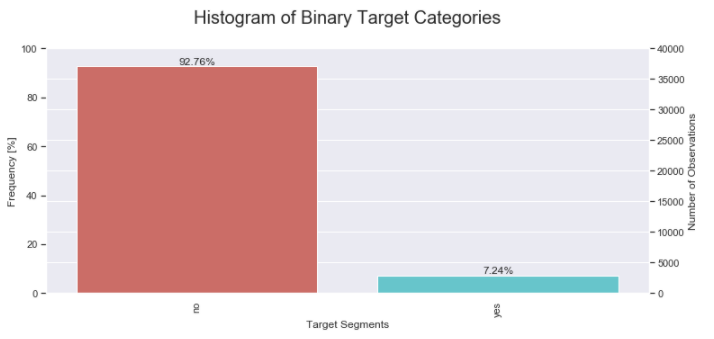

## 1.3 Results

You coul find ROC-AUC scores below for validation set and test set

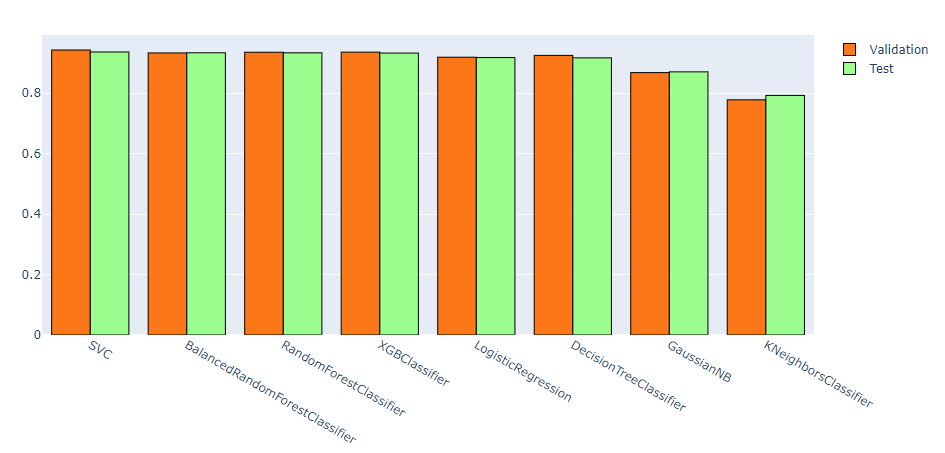

# 2. Data Understanding

In [1]:
# Importing data
import pandas as pd

path = "term-deposit-marketing-2020.csv"
data = pd.read_csv(path)

In [2]:
# Preview
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no

In [3]:
# Replacing unknown to np.NaN
import numpy as np
data.replace("unknown",np.NaN,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          39765 non-null object
marital      40000 non-null object
education    38469 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      27235 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
data.describe()

age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000

## 2.1 Variable Type and Data Structure Consistency

In [54]:
def SimpleDataAnalysis(data): 
  import psutil, os, gc, time
  import io
  import pandas as pd
  from itertools import groupby 
  print('Simple data analysis has began :\n')
  proc=psutil.Process(os.getpid())
  gc.collect()
  mem_0=proc.memory_info().rss
  start_time=time.time()

  
  entry_length_list = [] 
  variable_name_list = []
  total_entry_list = [] 
  number_of_missing_values_list = []
  ratio_of_missing_values_list = []
  data_types_list = []
  unique_values_list = []
  number_of_unique_values_list = []

  for col in data.columns:
    buffer = io.StringIO()
    data[[col]].info(buf=buffer)
    data_info = buffer.getvalue().split('\n')
    entry_length = int(data_info[1].split(' ')[1])
    
    a = [''.join(j).strip() for sub in data_info[3].split(' ')
    for k, j in groupby(sub, str.isdigit)]
    
    variable_name = a[0]
    total_entry = int(a[1])
    number_of_missing_values = entry_length-total_entry
    ratio_of_missing_values = round(float(100*(number_of_missing_values/entry_length)),4)
    data_type =a[3]
    number_of_unique_values = len(data[col].unique())
    unique_values = data[col].unique()

  

    entry_length_list.append(entry_length)
    variable_name_list.append(variable_name)
    total_entry_list.append(total_entry)
    number_of_missing_values_list.append(number_of_missing_values)
    ratio_of_missing_values_list.append(ratio_of_missing_values)
    data_types_list.append(data_type)
    unique_values_list.append(unique_values)
    number_of_unique_values_list.append(number_of_unique_values)

  data_info_data=pd.DataFrame({'Variable_Name':variable_name_list,'Total_Entry(#)':total_entry_list,'Missing_Value(#)':number_of_missing_values_list,'Missing_Value(%)':ratio_of_missing_values_list,'Data_Type':data_types_list,'Unique_Values':unique_values_list,'Unique_Value(#)':number_of_unique_values_list})
  print("Simple data analysis has been completed in %s minutes !"%((time.time()-start_time)/60))

  return data_info_data.sort_values(by='Missing_Value(%)',ascending=False)

In [55]:
data_info = SimpleDataAnalysis(data)
data_info = data_info.set_index("Variable_Name")
data_info

Simple data analysis has began :

Simple data analysis has been completed in 0.006063250700632731 minutes !


Total_Entry(#)  Missing_Value(#)  Missing_Value(%) Data_Type  \
Variable_Name                                                                 
contact                 27235             12765           31.9125    object   
education               38469              1531            3.8275    object   
job                     39765               235            0.5875    object   
age                     40000                 0            0.0000       int   
marital                 40000                 0            0.0000    object   
default                 40000                 0            0.0000    object   
balance                 40000                 0            0.0000       int   
housing                 40000                 0            0.0000    object   
loan                    40000                 0            0.0000    object   
day                     40000                 0            0.0000       int   
month                   40000                 0            0.0000    object   
duration                40000                 0            0.0000       int   
campaign                40000                 0            0.0000       int   
y                       40000                 0            0.0000       int   

                                                   Unique_Values  \
Variable_Name                                                      
contact                               [nan, cellular, telephone]   
education                    [tertiary, secondary, nan, primary]   
job            [management, technician, entrepreneur, blue-co...   
age            [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...   
marital                              [married, single, divorced]   
default                                                [no, yes]   
balance        [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...   
housing                                                [yes, no]   
loan                                                   [no, yes]   
day            [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...   
month          [may, jun, jul, aug, oct, nov, dec, jan, feb, ...   
duration       [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...   
campaign       [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...   
y                                                         [0, 1]   

               Unique_Value(#)  
Variable_Name                   
contact                      3  
education                    4  
job                         12  
age                         70  
marital                      3  
default                      2  
balance                   6849  
housing                      2  
loan                         2  
day                         31  
month                       11  
duration                  1535  
campaign                    48  
y                            2

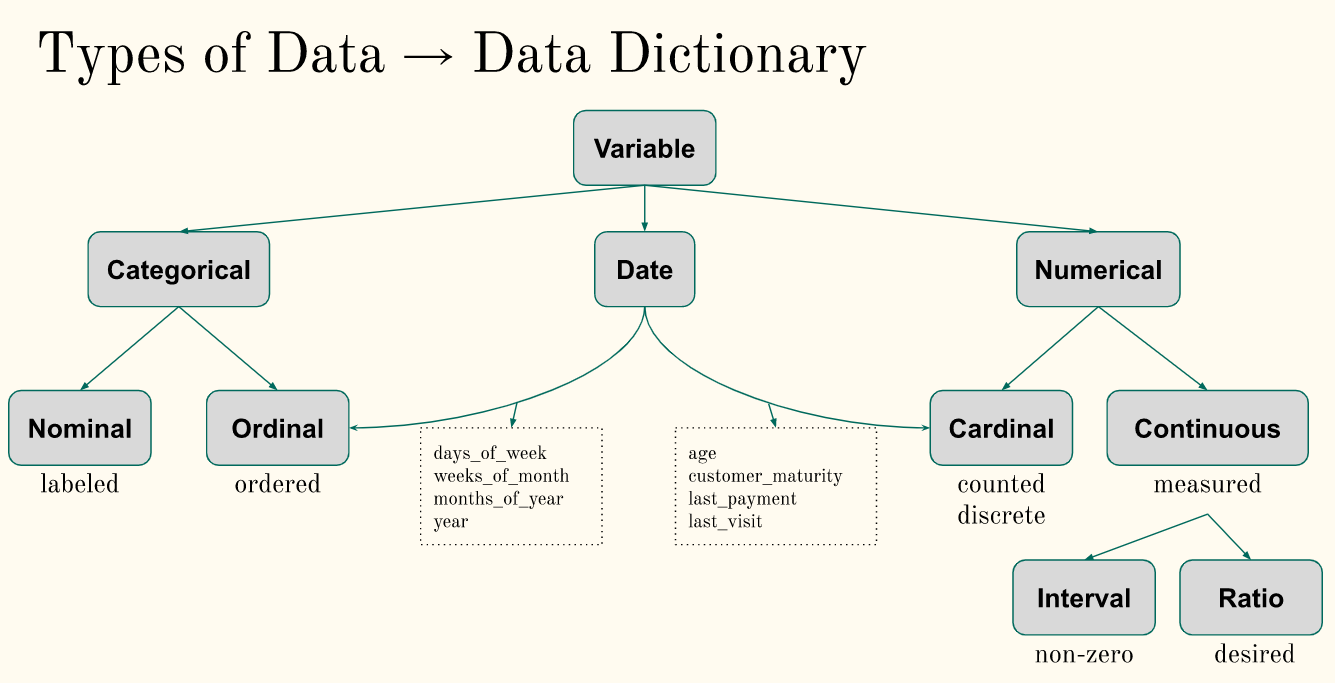

In [8]:
# Importing variable structure of data
path_1 = "variables.csv"
data_dictionary = pd.read_csv(path_1)
data_dictionary = data_dictionary.set_index("variable_name")
data_dictionary

variable_definition  \
variable_name                                                      
age                                              age of customer   
job                                                  type of job   
marital                                           marital status   
education                                              education   
default                                   has credit in default?   
balance                          average yearly balance in euros   
housing                                      has a housing loan?   
loan                                          has personal loan?   
contact                               contact communication type   
day                                last contact day of the month   
month                                 last contact month of year   
duration                        last contact duration in seconds   
campaign       number of contacts performed during this campa...   
y                   has the client subscribed to a term deposit?   

              Variable_Structure  
variable_name                     
age                      numeric  
job                  categorical  
marital              categorical  
education            categorical  
default              categorical  
balance                  numeric  
housing              categorical  
loan                 categorical  
contact              categorical  
day                      numeric  
month                categorical  
duration                 numeric  
campaign                 numeric  
y                    categorical

In [145]:
# Overview of data
frames=[data_info, data_dictionary.loc[:,["variable_definition","Variable_Structure"]]]
data_info = pd.concat(frames,axis=1)
data_info

C:\Users\chocl\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




Total_Entry(#)  Missing_Value(#)  Missing_Value(%) Data_Type  \
age                 40000                 0            0.0000       int   
balance             40000                 0            0.0000       int   
campaign            40000                 0            0.0000       int   
contact             27235             12765           31.9125    object   
day                 40000                 0            0.0000       int   
default             40000                 0            0.0000    object   
duration            40000                 0            0.0000       int   
education           38469              1531            3.8275    object   
housing             40000                 0            0.0000    object   
job                 39765               235            0.5875    object   
loan                40000                 0            0.0000    object   
marital             40000                 0            0.0000    object   
month               40000                 0            0.0000    object   
y                   40000                 0            0.0000       int   

                                               Unique_Values  Unique_Value(#)  \
age        [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...               70   
balance    [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...             6849   
campaign   [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...               48   
contact                           [nan, cellular, telephone]                3   
day        [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...               31   
default                                            [no, yes]                2   
duration   [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...             1535   
education                [tertiary, secondary, nan, primary]                4   
housing                                            [yes, no]                2   
job        [management, technician, entrepreneur, blue-co...               12   
loan                                               [no, yes]                2   
marital                          [married, single, divorced]                3   
month      [may, jun, jul, aug, oct, nov, dec, jan, feb, ...               11   
y                                                     [0, 1]                2   

                                         variable_definition  \
age                                          age of customer   
balance                      average yearly balance in euros   
campaign   number of contacts performed during this campa...   
contact                           contact communication type   
day                            last contact day of the month   
default                               has credit in default?   
duration                    last contact duration in seconds   
education                                          education   
housing                                  has a housing loan?   
job                                              type of job   
loan                                      has personal loan?   
marital                                       marital status   
month                             last contact month of year   
y               has the client subscribed to a term deposit?   

          Variable_Structure  
age                  numeric  
balance              numeric  
campaign             numeric  
contact          categorical  
day                  numeric  
default          categorical  
duration             numeric  
education        categorical  
housing          categorical  
job              categorical  
loan             categorical  
marital          categorical  
month            categorical  
y                categorical

## 2.2 Separate Numarical and Categorical Columns

In [10]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="numeric")].index)
len(numerical_columns), numerical_columns

(5, ['age', 'balance', 'campaign', 'day', 'duration'])

In [11]:
categorical_columns = list(data_info.loc[(data_info.Variable_Structure=="categorical")].index)
categorical_columns.remove("y")
len(categorical_columns), categorical_columns

(8,
 ['contact',
  'default',
  'education',
  'housing',
  'job',
  'loan',
  'marital',
  'month'])

## 2.3 Building the Data Variable

In [12]:
%matplotlib inline
# Histogram of the target categories
def histogram(df,feature):
    import seaborn as sns
    import matplotlib.pyplot as plt
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    #plt.savefig('col.png')
    del ncount, x, y

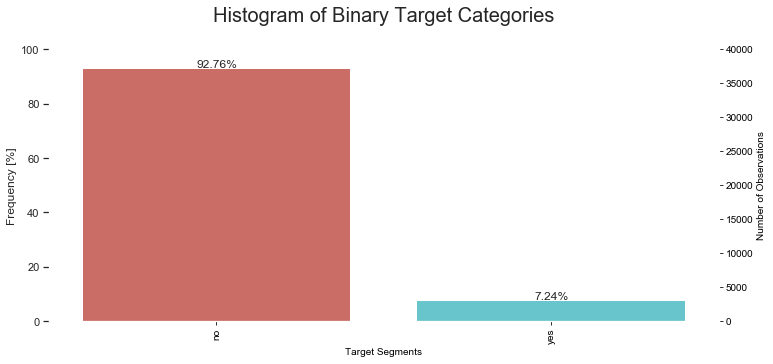

In [13]:
histogram(data,"y")

# 3. Data Analysis

## 3.1 Drop if the target is null

In [14]:
data["y"].value_counts(dropna=False)

no     37104
yes     2896
Name: y, dtype: int64

In [15]:
data["y"].isnull().sum()

0

In [16]:
# If we have null values in target , we should have dropped null variables from data
# data = data[data["y"].notnull()]

## 3.2 Check dublicate values

In [17]:
len(data.index)==data.shape[0] #no duplicate data

True

## 3.3 Zero Variance/Singleton Columns

In [18]:
# Zero Variance for Numerical Columns
def ZeroVarianceFinder(df, numerical_columns):  
    import pandas as pd
    import numpy as np

    zerovariance_numerical_features=[]
    for col in numerical_columns:
        try:
            if pd.DataFrame(df[col]).describe().loc['std'][0] == 0.00 or \
            np.isnan(pd.DataFrame(df[col]).describe().loc['std'][0]):
                zerovariance_numerical_features.append(col)
        except:
            print("Error:",col)
    return zerovariance_numerical_features


In [19]:
zerovariance_numerical_features = ZeroVarianceFinder(data,numerical_columns)
zerovariance_numerical_features

[]

In [20]:
# Singleton Columns for Categorical Columns
singleton_categorical_features = [col for col in categorical_columns if len(data[col].unique()) <= 1]
len(singleton_categorical_features), singleton_categorical_features

(0, [])

## 3.4 Train-Val-Test Split

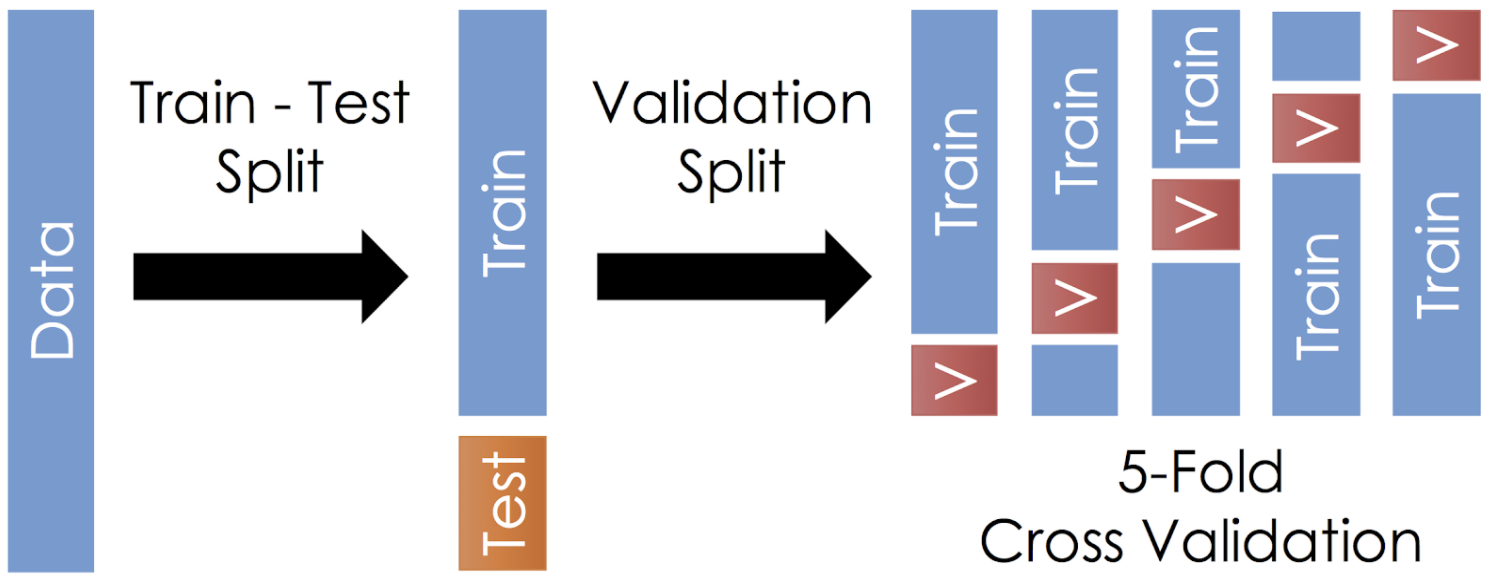

In [21]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day month  duration  campaign   y  
0     NaN    5   may       261         1  no  
1     NaN    5   may       151         1  no  
2     NaN    5   may        76         1  no  
3     NaN    5   may        92         1  no  
4     NaN    5   may       198         1  no

In [22]:
data["y"] = [ 0 if each == "no" else 1 for each in data["y"]]

In [23]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day month  duration  campaign  y  
0     NaN    5   may       261         1  0  
1     NaN    5   may       151         1  0  
2     NaN    5   may        76         1  0  
3     NaN    5   may        92         1  0  
4     NaN    5   may       198         1  0

In [24]:
X = data.iloc[:,:13]
y = data["y"]

In [25]:
X.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day month  duration  campaign  
0     NaN    5   may       261         1  
1     NaN    5   may       151         1  
2     NaN    5   may        76         1  
3     NaN    5   may        92         1  
4     NaN    5   may       198         1

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [27]:
X.shape, y.shape

((40000, 13), (40000,))

In [28]:
# https://stackoverflow.com/questions/40829137/stratified-train-validation-test-split-in-scikit-learn
from sklearn.model_selection import train_test_split
def train_val_test_split(X, y, train_size, val_size, test_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size,stratify=y)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size,stratify=y_train_val)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [29]:
train_size = 0.6
val_size = 0.2
test_size = 0.2

In [30]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, train_size, val_size, test_size)

In [31]:
X_train.shape[0]/X.shape[0], X_val.shape[0]/X.shape[0], X_test.shape[0]/X.shape[0], \
y_train.shape[0]/y.shape[0], y_val.shape[0]/y.shape[0], y_test.shape[0]/y.shape[0]

(0.599975, 0.200025, 0.2, 0.599975, 0.200025, 0.2)

In [32]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((23999, 13), (8001, 13), (8000, 13), (23999,), (8001,), (8000,))

In [33]:
train = pd.concat([X_train, y_train],axis=1)
val = pd.concat([X_val, y_val],axis=1)
test = pd.concat([X_test, y_test],axis=1)

In [34]:
train.to_csv("train.csv", index=True, header=True)
val.to_csv("val.csv", index=True, header=True)
test.to_csv("test.csv", index=True, header=True)

In [35]:
train["y"].value_counts(normalize=True)

0    0.92758
1    0.07242
Name: y, dtype: float64

In [36]:
val["y"].value_counts(normalize=True)

0    0.927634
1    0.072366
Name: y, dtype: float64

In [37]:
test["y"].value_counts(normalize=True)

0    0.927625
1    0.072375
Name: y, dtype: float64

## 3.2 Outlier Handling

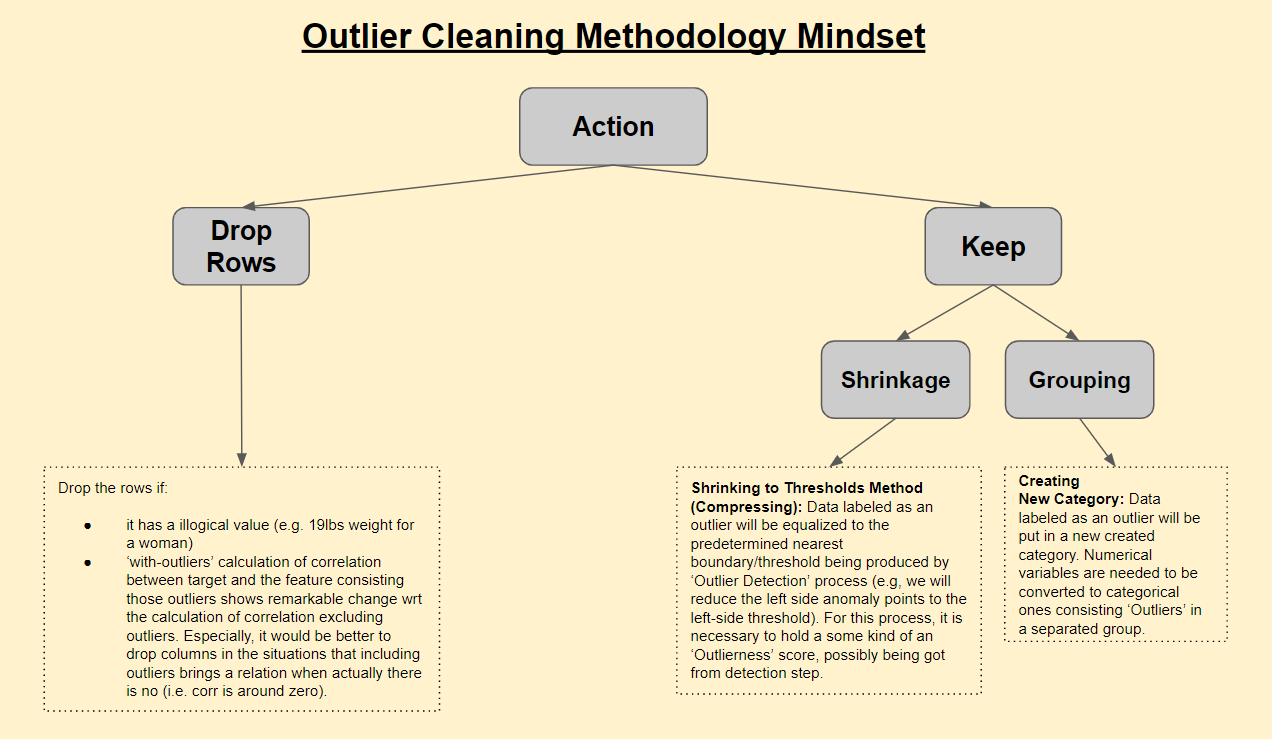

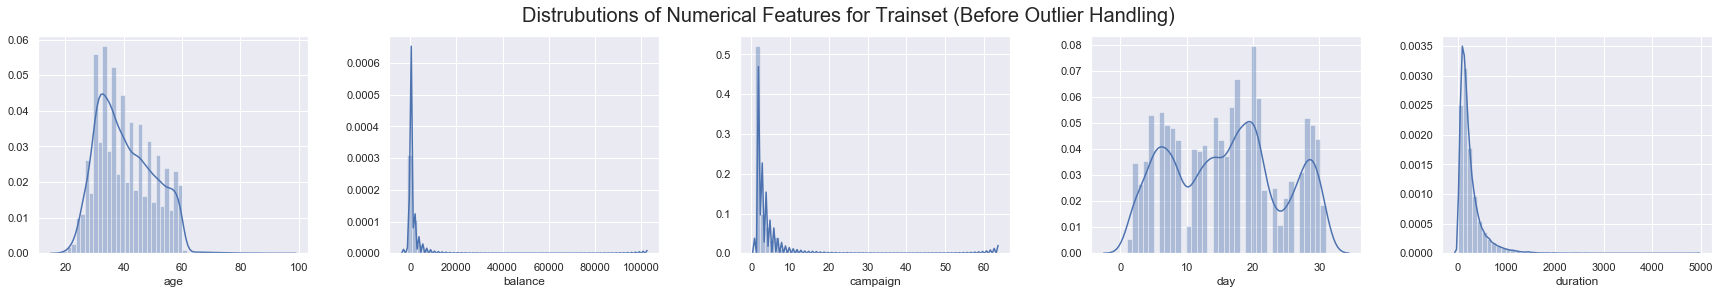

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
fig.suptitle("Distrubutions of Numerical Features for Trainset (Before Outlier Handling)",fontsize = 20)
fig.set_size_inches(w = 30, h = 4)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, col in enumerate(numerical_columns):
  ax = fig.add_subplot(1,len(numerical_columns), i+1)
  sns.distplot(X_train.loc[:,col])

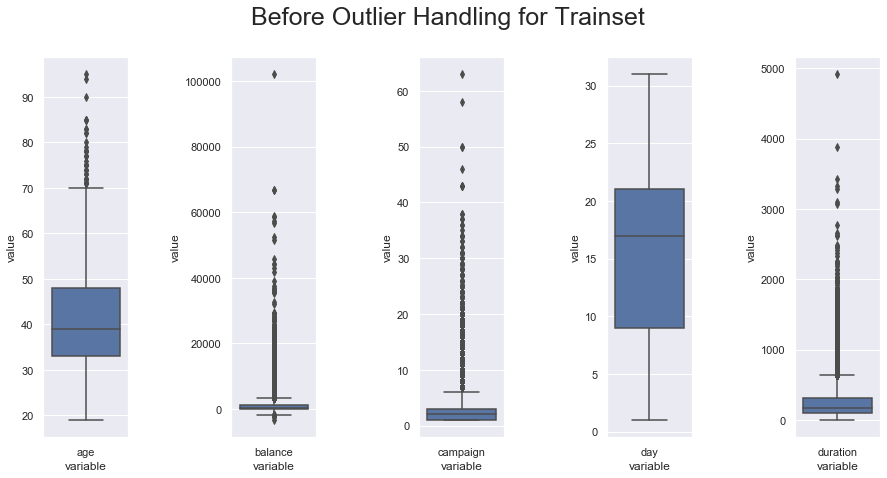

In [39]:
melted_features = []
fig = plt.figure()
fig.set_size_inches(w = 15, h = 7)
fig.subplots_adjust(hspace=0.4, wspace=1.2)
fig.suptitle("Before Outlier Handling for Trainset", fontsize = 25)

for i, col in enumerate(numerical_columns):
    melted_features.append(pd.melt(X_train,value_vars = col))
    ax = fig.add_subplot(1, 5, i+1)
    # ax.set(ylim=(-16000, 40000))
    sns.boxplot(x = "variable", y = "value",data= melted_features[i])

In [40]:
# skewness along the index axis 
data_train_skewness = X_train[numerical_columns].skew(axis = 0, skipna = True)

        
sparse_columns=[]
for col in numerical_columns:
    if (train[col].quantile(0.01)==train[col].quantile(0.25)==train[col].mode()[0]):
        sparse_columns.append(col)

print("data_train_skewness:\n",data_train_skewness,"\n")
print("sparse_columns:",sparse_columns)

data_train_skewness:
 age         0.438297
balance     8.298151
campaign    4.751071
day         0.065989
duration    3.223298
dtype: float64 

sparse_columns: ['campaign']


### 3.2.1 IQR

<b>Note : </b>The method of using Z scores for capping/ trimming the outliers is valid ONLY if the particular feature is normally distributed
Since our data here is NOT normally distributed, we should use other techniques, one of which is this IQR method

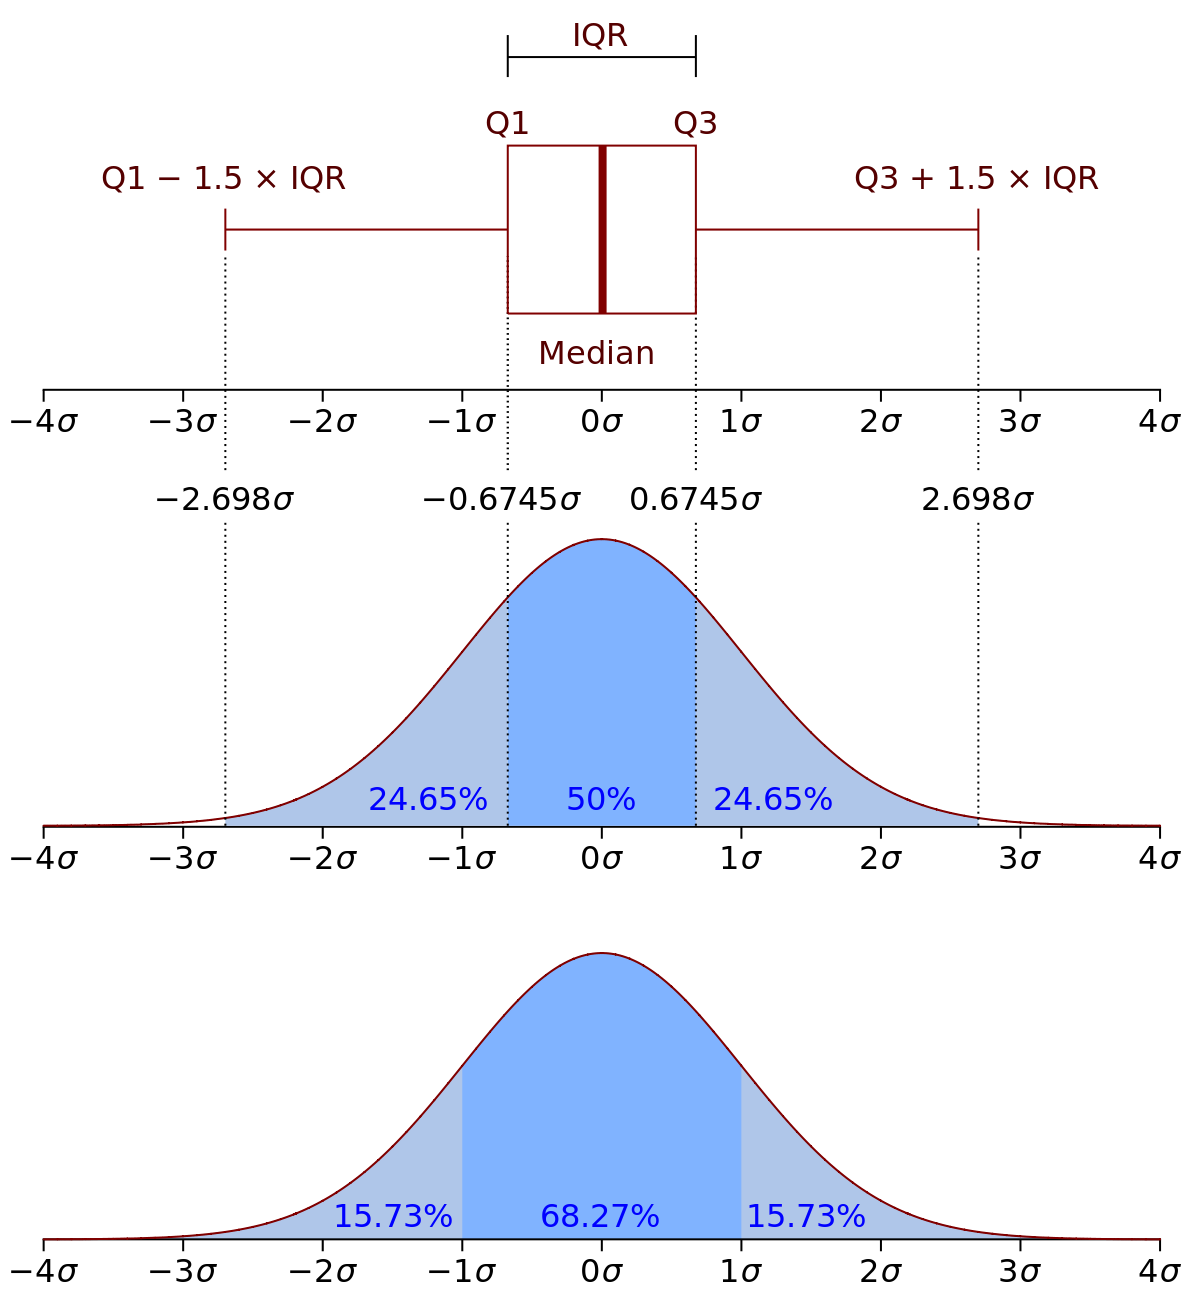

In [41]:
iqr_df = pd.DataFrame(index = numerical_columns, columns = ["Q1","Q3","IQR","Lower-Bound","Lower-Outlier-Value","Upper-Bound","Upper-Outlier-Value", "#-of-Outliers"])
data_train_outlier_cleaned = X_train.copy()

for col in numerical_columns:

  if (col !=  "campaign"):
    q1 = data_train_outlier_cleaned.describe().loc['25%',col]
    q3 = data_train_outlier_cleaned.describe().loc['75%',col]
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    number_of_outlier = data_train_outlier_cleaned.loc[(data_train_outlier_cleaned.loc[:,col]<lower_bound) | (data_train_outlier_cleaned.loc[:,col]>upper_bound)].shape[0]

    print("Non-Sparse:",col)

    if lower_bound < 0:
      lower_outlier_value = (lower_bound * 1.25)
    else:
      lower_outlier_value = (lower_bound * 0.75)

    iqr_df.loc[col,:] = [q1,q3,iqr,lower_bound,lower_outlier_value,upper_bound,upper_bound*1.25,number_of_outlier]

    data_train_outlier_cleaned.loc[(data_train_outlier_cleaned.loc[:,col]<lower_bound),col] =  lower_outlier_value
    data_train_outlier_cleaned.loc[(data_train_outlier_cleaned.loc[:,col]>upper_bound),col] =  upper_bound*1.25

  else: #for sparse columns
    most_frequent_item = data_train_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(data_train_outlier_cleaned[data_train_outlier_cleaned[col] != most_frequent_item][col])
    
    print("Sparse:",col)
    
    q1 = nonsparse_data.describe().loc['25%',col]
    q3 = nonsparse_data.describe().loc['75%',col]
    iqr = q3 - q1
   
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    number_of_outlier = nonsparse_data.loc[(nonsparse_data.loc[:,col]<lower_bound) | (nonsparse_data.loc[:,col]>upper_bound)].shape[0]

    if lower_bound < 0:
      lower_outlier_value = lower_bound * 1.25
      data_train_outlier_cleaned.loc[(data_train_outlier_cleaned.loc[:,col]<lower_bound) & (data_train_outlier_cleaned.loc[:,col] != 0),col] =  lower_outlier_value 
    else:
      lower_outlier_value = lower_bound * 0.75
      data_train_outlier_cleaned.loc[(data_train_outlier_cleaned.loc[:,col]<lower_bound) & (data_train_outlier_cleaned.loc[:,col] != 0),col] =  lower_outlier_value 

    iqr_df.loc[col,:] = [q1,q3,iqr,lower_bound,lower_outlier_value,upper_bound,upper_bound*1.25,number_of_outlier]

    data_train_outlier_cleaned.loc[(data_train_outlier_cleaned.loc[:,col]>upper_bound),col] =  upper_bound*1.25
    
iqr_df

Non-Sparse: age
Non-Sparse: balance
Sparse: campaign
Non-Sparse: day
Non-Sparse: duration


Q1      Q3     IQR Lower-Bound Lower-Outlier-Value Upper-Bound  \
age         33      48      15        10.5               7.875        70.5   
balance     56  1315.5  1259.5    -1833.25            -2291.56     3204.75   
campaign     2       4       2          -1               -1.25           7   
day          9      21      12          -9              -11.25          39   
duration  99.5     313   213.5     -220.75            -275.938      633.25   

         Upper-Outlier-Value #-of-Outliers  
age                   88.125            42  
balance              4005.94          2568  
campaign                8.75          1372  
day                    48.75             0  
duration             791.562          1776

In [42]:
number_of_outlier_val = pd.DataFrame(index = numerical_columns, columns = ["#-of-Outliers"])
data_val_outlier_cleaned = X_val.copy()

for col in numerical_columns:

  if (col !=  "campaign"):
    number_of_outlier_val.loc[col,"#-of-Outliers"] = data_val_outlier_cleaned.loc[(data_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (data_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    print("Non-Sparse:",col)

    data_val_outlier_cleaned.loc[(data_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    data_val_outlier_cleaned.loc[(data_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]

  else: #for sparse columns
    most_frequent_item = data_val_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(data_val_outlier_cleaned[data_val_outlier_cleaned[col] != most_frequent_item][col])

    print("Sparse:",col)
    
    number_of_outlier_val.loc[col,"#-of-Outliers"] = nonsparse_data.loc[(nonsparse_data.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (nonsparse_data.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    data_val_outlier_cleaned.loc[(data_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) & (data_val_outlier_cleaned.loc[:,col] != 0),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    data_val_outlier_cleaned.loc[(data_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]
    
number_of_outlier_val

Non-Sparse: age
Non-Sparse: balance
Sparse: campaign
Non-Sparse: day
Non-Sparse: duration


#-of-Outliers
age                  17
balance             907
campaign            478
day                   0
duration            586

In [43]:
number_of_outlier_test = pd.DataFrame(index = numerical_columns, columns = ["#-of-Outliers"])
data_test_outlier_cleaned = X_test.copy()

for col in numerical_columns:

  if (col !=  "campaign"):
    number_of_outlier_test.loc[col,"#-of-Outliers"] = data_test_outlier_cleaned.loc[(data_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (data_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    print("Non-Sparse:",col)

    data_test_outlier_cleaned.loc[(data_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    data_test_outlier_cleaned.loc[(data_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]

  else: #for sparse columns
    most_frequent_item = data_test_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(data_test_outlier_cleaned[data_test_outlier_cleaned[col] != most_frequent_item][col])

    print("Sparse:",col)
    
    number_of_outlier_test.loc[col,"#-of-Outliers"] = nonsparse_data.loc[(nonsparse_data.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (nonsparse_data.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    data_test_outlier_cleaned.loc[(data_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) & (data_test_outlier_cleaned.loc[:,col] != 0),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    data_test_outlier_cleaned.loc[(data_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]
    
number_of_outlier_test

Non-Sparse: age
Non-Sparse: balance
Sparse: campaign
Non-Sparse: day
Non-Sparse: duration


#-of-Outliers
age                  20
balance             816
campaign            443
day                   0
duration            621

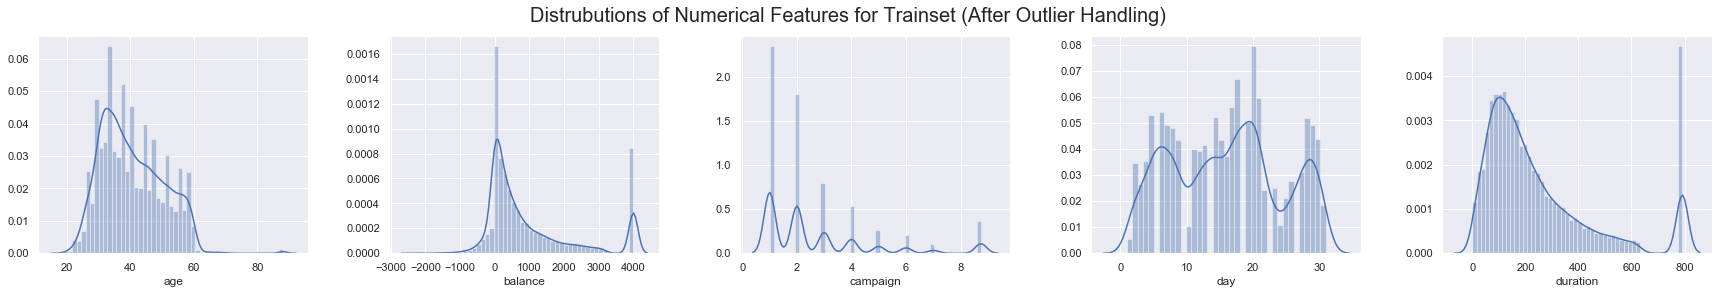

In [44]:
fig = plt.figure()
fig.suptitle("Distrubutions of Numerical Features for Trainset (After Outlier Handling)",fontsize = 20)
fig.set_size_inches(w = 30, h = 4)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, col in enumerate(numerical_columns):
  ax = fig.add_subplot(1,len(numerical_columns), i+1)
  sns.distplot(data_train_outlier_cleaned.loc[:,col])

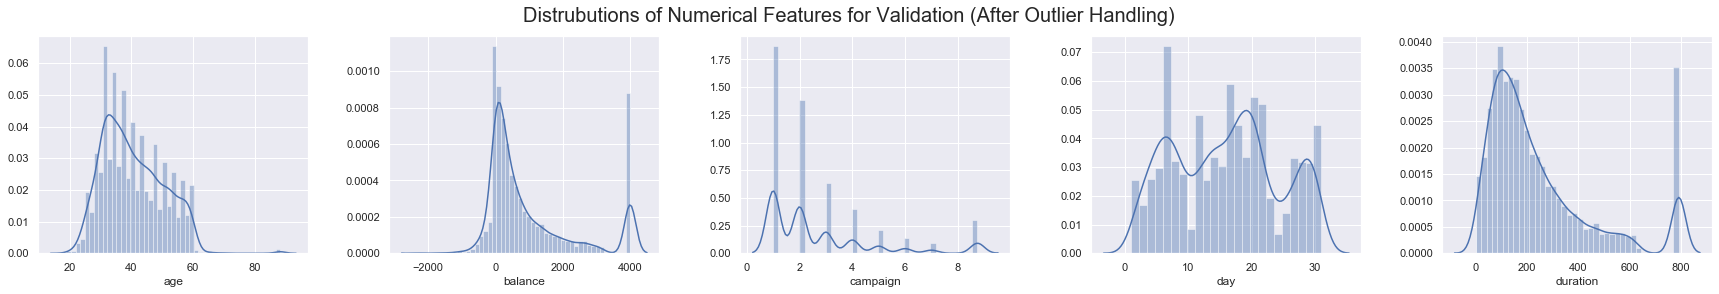

In [45]:
fig = plt.figure()
fig.suptitle("Distrubutions of Numerical Features for Validation (After Outlier Handling)",fontsize = 20)
fig.set_size_inches(w = 30, h = 4)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, col in enumerate(numerical_columns):
  ax = fig.add_subplot(1,len(numerical_columns), i+1)
  sns.distplot(data_val_outlier_cleaned.loc[:,col])

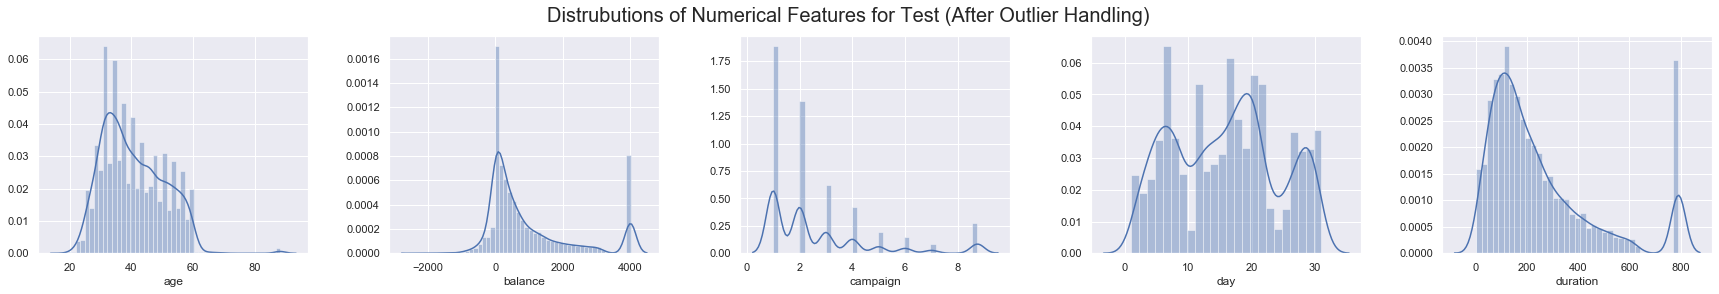

In [46]:
fig = plt.figure()
fig.suptitle("Distrubutions of Numerical Features for Test (After Outlier Handling)",fontsize = 20)
fig.set_size_inches(w = 30, h = 4)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i, col in enumerate(numerical_columns):
  ax = fig.add_subplot(1,len(numerical_columns), i+1)
  sns.distplot(data_test_outlier_cleaned.loc[:,col])

In [47]:
X_train = data_train_outlier_cleaned
X_test = data_test_outlier_cleaned
X_val = data_val_outlier_cleaned

## 3.3 Missing Value Handling

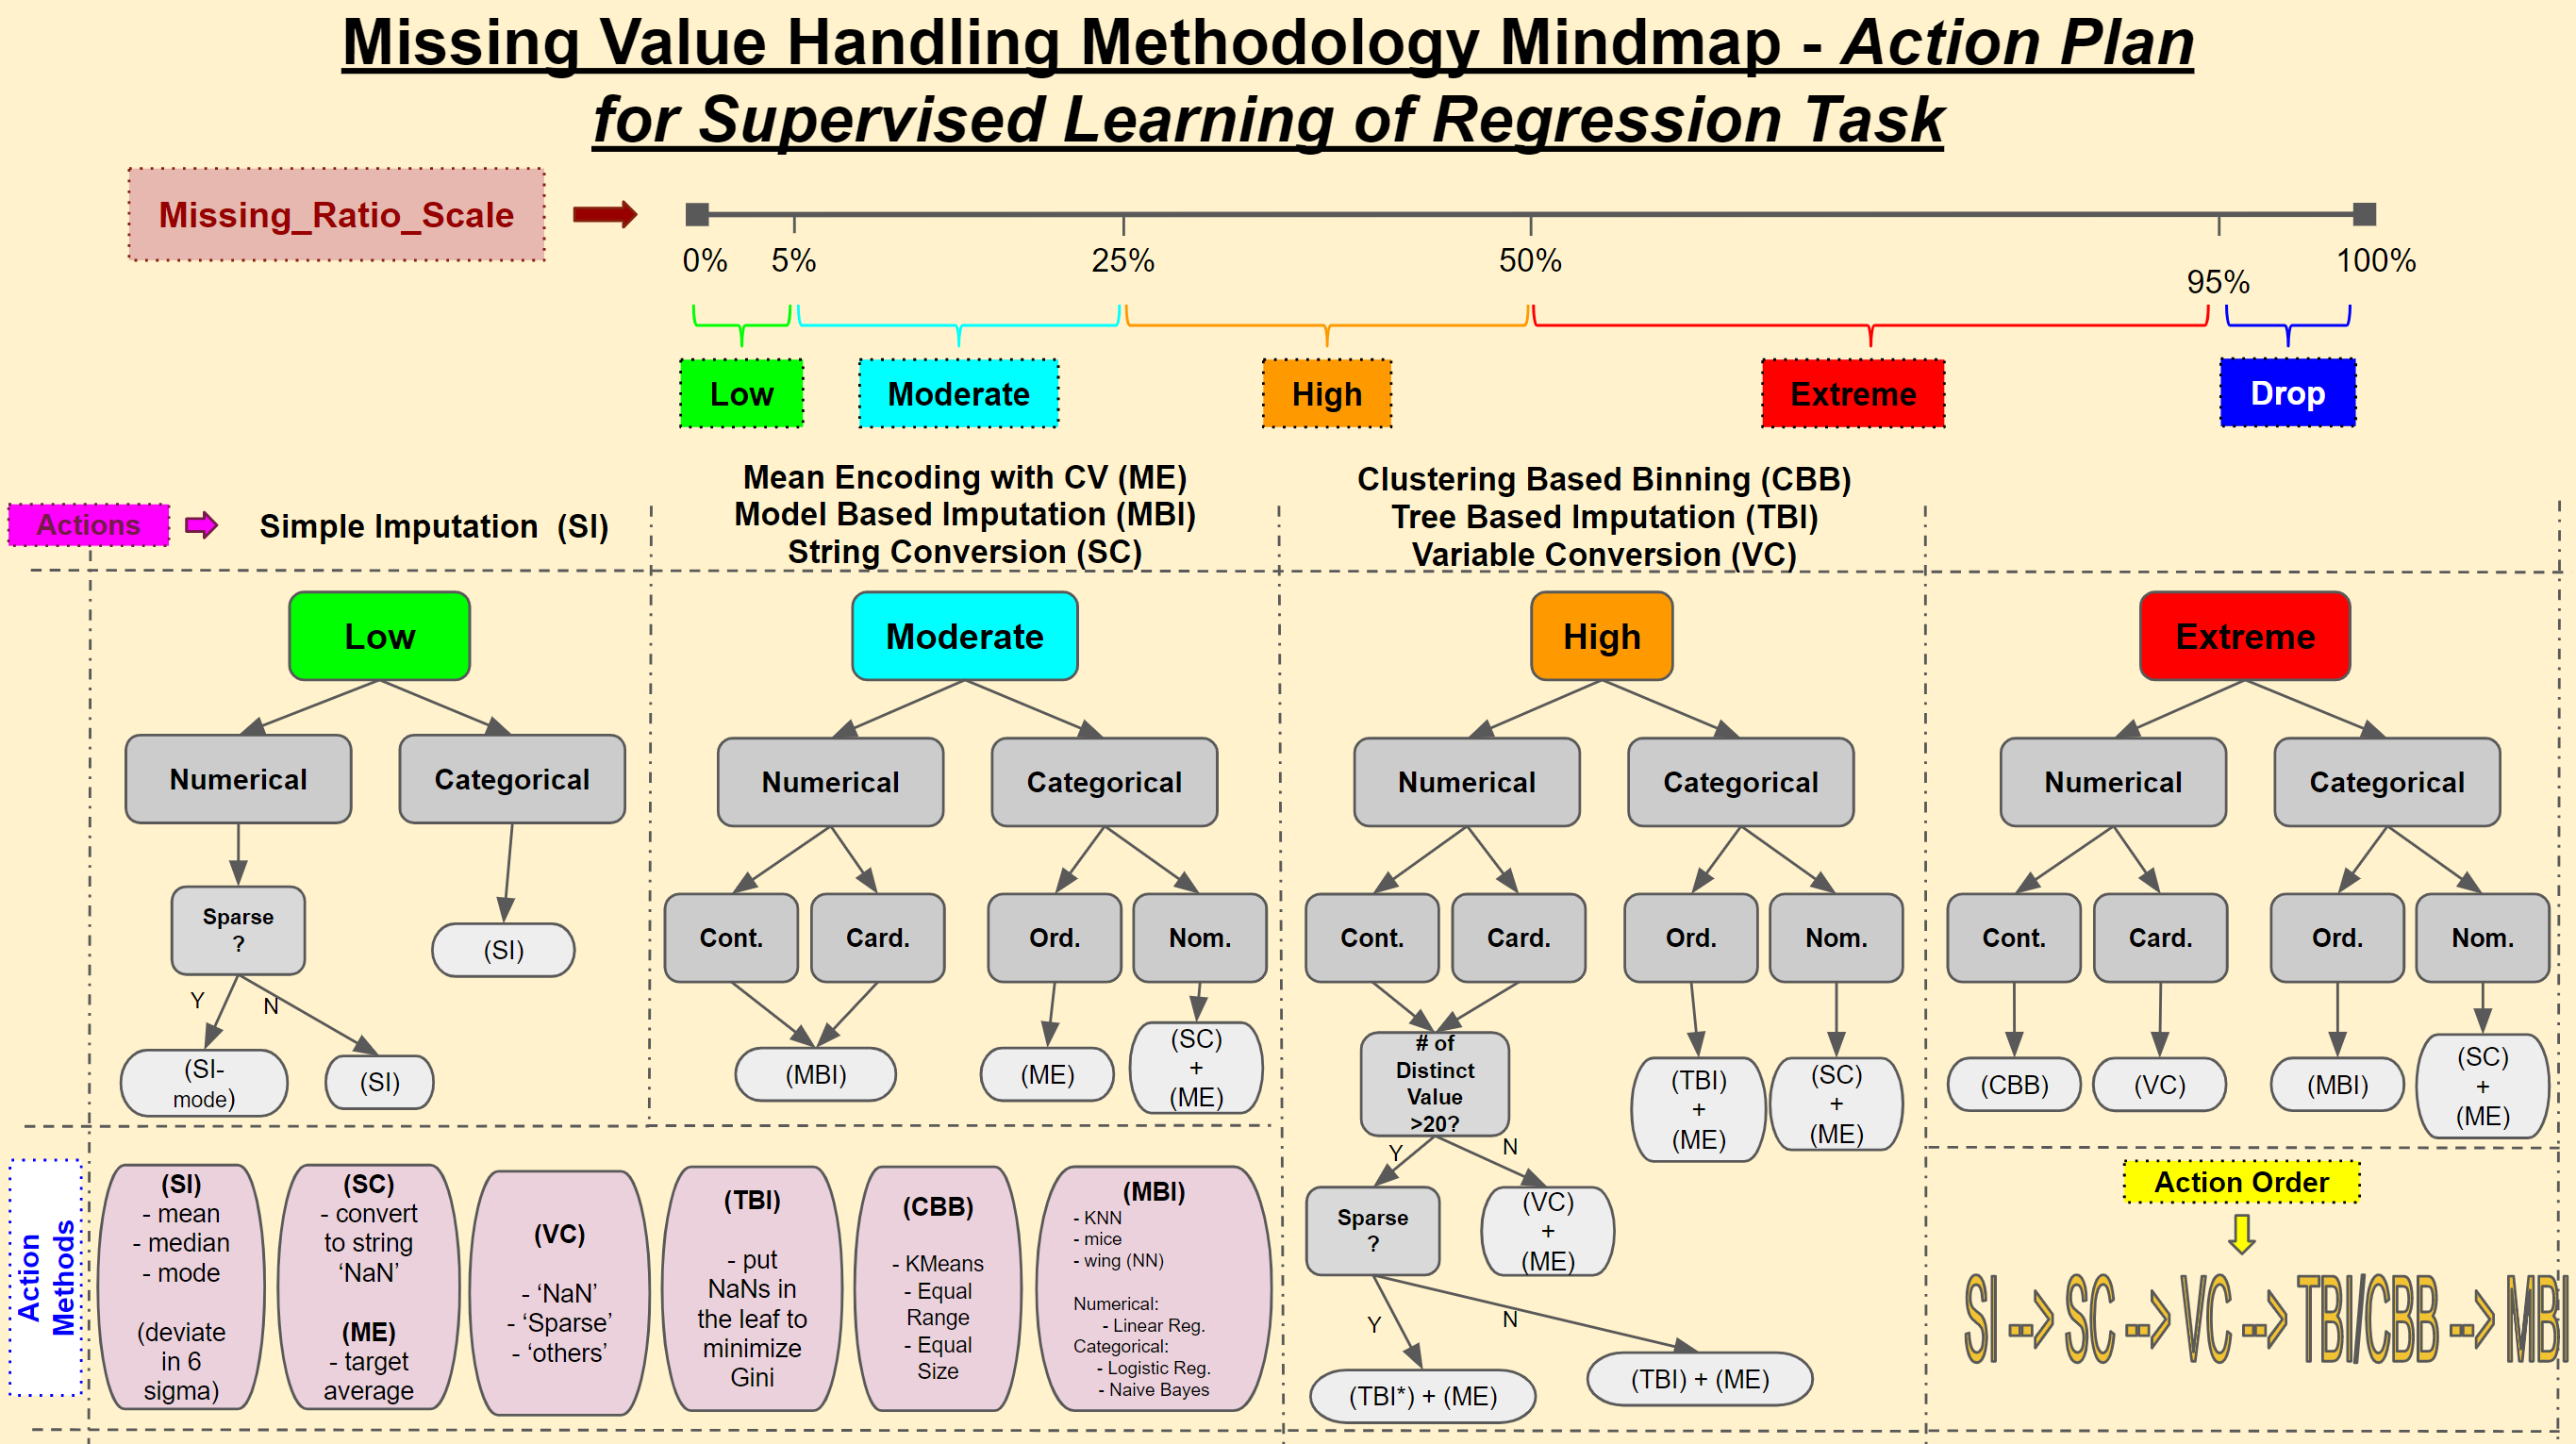

In [146]:
data_info

Total_Entry(#)  Missing_Value(#)  Missing_Value(%) Data_Type  \
age                 40000                 0            0.0000       int   
balance             40000                 0            0.0000       int   
campaign            40000                 0            0.0000       int   
contact             27235             12765           31.9125    object   
day                 40000                 0            0.0000       int   
default             40000                 0            0.0000    object   
duration            40000                 0            0.0000       int   
education           38469              1531            3.8275    object   
housing             40000                 0            0.0000    object   
job                 39765               235            0.5875    object   
loan                40000                 0            0.0000    object   
marital             40000                 0            0.0000    object   
month               40000                 0            0.0000    object   
y                   40000                 0            0.0000       int   

                                               Unique_Values  Unique_Value(#)  \
age        [58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...               70   
balance    [2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...             6849   
campaign   [1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...               48   
contact                           [nan, cellular, telephone]                3   
day        [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...               31   
default                                            [no, yes]                2   
duration   [261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...             1535   
education                [tertiary, secondary, nan, primary]                4   
housing                                            [yes, no]                2   
job        [management, technician, entrepreneur, blue-co...               12   
loan                                               [no, yes]                2   
marital                          [married, single, divorced]                3   
month      [may, jun, jul, aug, oct, nov, dec, jan, feb, ...               11   
y                                                     [0, 1]                2   

                                         variable_definition  \
age                                          age of customer   
balance                      average yearly balance in euros   
campaign   number of contacts performed during this campa...   
contact                           contact communication type   
day                            last contact day of the month   
default                               has credit in default?   
duration                    last contact duration in seconds   
education                                          education   
housing                                  has a housing loan?   
job                                              type of job   
loan                                      has personal loan?   
marital                                       marital status   
month                             last contact month of year   
y               has the client subscribed to a term deposit?   

          Variable_Structure  
age                  numeric  
balance              numeric  
campaign             numeric  
contact          categorical  
day                  numeric  
default          categorical  
duration             numeric  
education        categorical  
housing          categorical  
job              categorical  
loan             categorical  
marital          categorical  
month            categorical  
y                categorical

In [56]:
Zero_MR_variables_list = data_info[data_info['Missing_Value(%)']==0].index.to_list()

Low_MR_variables_list = data_info[(data_info['Missing_Value(%)']>0) & (data_info['Missing_Value(%)']<=5)].index.to_list()

Moderate_MR_variables_list = data_info[(data_info['Missing_Value(%)']>5) & (data_info['Missing_Value(%)']<=25)].index.to_list()

High_MR_variables_list = data_info[(data_info['Missing_Value(%)']>25) & (data_info['Missing_Value(%)']<=50)].index.to_list()

Extreme_MR_variables_list = data_info[(data_info['Missing_Value(%)']>50) & (data_info['Missing_Value(%)']<=95)].index.to_list()

len(Zero_MR_variables_list),len(Low_MR_variables_list),len(Moderate_MR_variables_list),len(High_MR_variables_list),\
len(Extreme_MR_variables_list)

(11, 2, 0, 1, 0)

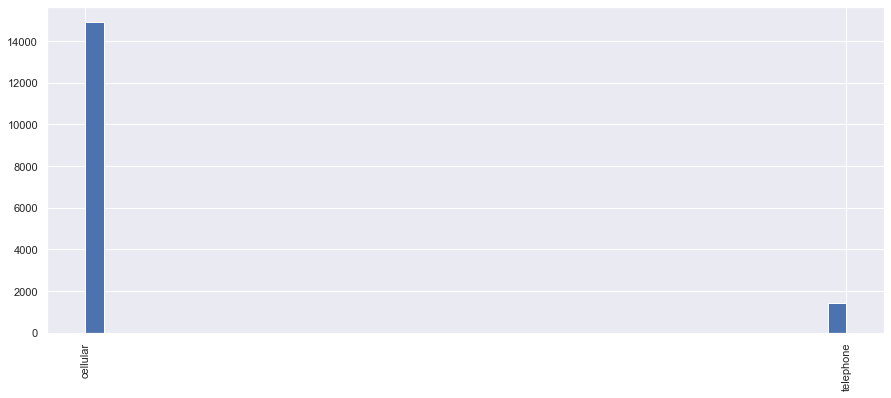

In [57]:
hist = X_train["contact"].hist(bins=42,figsize=(15,6),xrot=90)

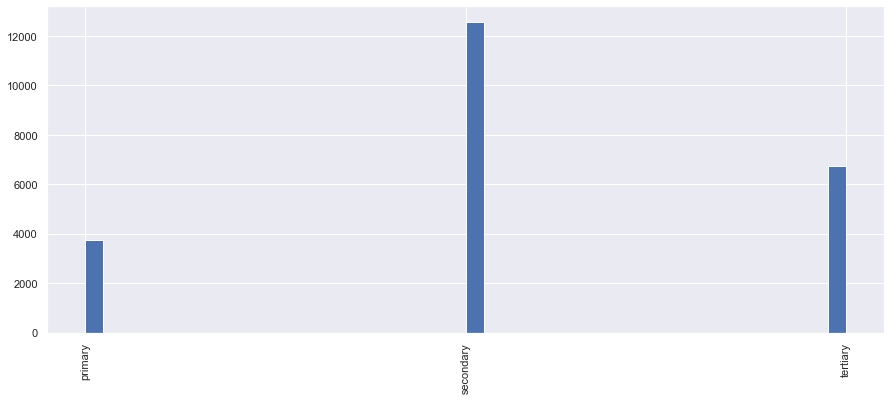

In [58]:
hist = X_train["education"].hist(bins=42,figsize=(15,6),xrot=90)

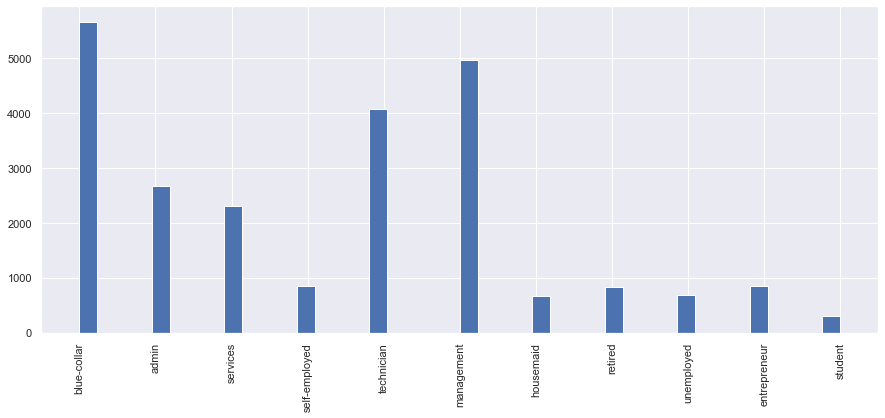

In [59]:
hist = X_train["job"].hist(bins=42,figsize=(15,6),xrot=90)

In [60]:
X_train_numerical = X_train.loc[:,numerical_columns]
X_train_categorical = X_train.loc[:,categorical_columns]

X_val_numerical = X_val.loc[:,numerical_columns]
X_val_categorical = X_val.loc[:,categorical_columns]

X_test_numerical = X_test.loc[:,numerical_columns]
X_test_categorical = X_test.loc[:,categorical_columns]

### 3.3.1 Adding Fatures to Capture NA for Train

We want that the models recognize missing values of columns

In [61]:
na_indices = X_train_categorical["contact"][X_train_categorical["contact"].isnull()].index.to_list()
X_train_categorical.insert(1,"Contact_Missing",0)
X_train_categorical.loc[na_indices,"Contact_Missing"]= 1
X_train_categorical.head()

contact  Contact_Missing default  education housing          job  \
23926   cellular                0      no    primary      no  blue-collar   
12911   cellular                0      no  secondary     yes        admin   
6961         NaN                1      no    primary     yes  blue-collar   
33546  telephone                0      no  secondary     yes     services   
29276   cellular                0      no  secondary     yes        admin   

      loan  marital month  
23926   no  married   aug  
12911  yes  married   jul  
6961    no  married   may  
33546   no  married   apr  
29276   no  married   feb

In [62]:
X_train_categorical.head()

contact  Contact_Missing default  education housing          job  \
23926   cellular                0      no    primary      no  blue-collar   
12911   cellular                0      no  secondary     yes        admin   
6961         NaN                1      no    primary     yes  blue-collar   
33546  telephone                0      no  secondary     yes     services   
29276   cellular                0      no  secondary     yes        admin   

      loan  marital month  
23926   no  married   aug  
12911  yes  married   jul  
6961    no  married   may  
33546   no  married   apr  
29276   no  married   feb

In [63]:
na_indices = X_train_categorical["education"][X_train_categorical["education"].isnull()].index.to_list()
X_train_categorical.insert(4,"Education_Missing",0)
X_train_categorical.loc[na_indices,"Education_Missing"]= 1
X_train_categorical.head()

contact  Contact_Missing default  education  Education_Missing  \
23926   cellular                0      no    primary                  0   
12911   cellular                0      no  secondary                  0   
6961         NaN                1      no    primary                  0   
33546  telephone                0      no  secondary                  0   
29276   cellular                0      no  secondary                  0   

      housing          job loan  marital month  
23926      no  blue-collar   no  married   aug  
12911     yes        admin  yes  married   jul  
6961      yes  blue-collar   no  married   may  
33546     yes     services   no  married   apr  
29276     yes        admin   no  married   feb

In [64]:
na_indices = X_train_categorical["job"][X_train_categorical["job"].isnull()].index.to_list()
X_train_categorical.insert(7,"Job_Missing",0)
X_train_categorical.loc[na_indices,"Job_Missing"]= 1
X_train_categorical.head()

contact  Contact_Missing default  education  Education_Missing  \
23926   cellular                0      no    primary                  0   
12911   cellular                0      no  secondary                  0   
6961         NaN                1      no    primary                  0   
33546  telephone                0      no  secondary                  0   
29276   cellular                0      no  secondary                  0   

      housing          job  Job_Missing loan  marital month  
23926      no  blue-collar            0   no  married   aug  
12911     yes        admin            0  yes  married   jul  
6961      yes  blue-collar            0   no  married   may  
33546     yes     services            0   no  married   apr  
29276     yes        admin            0   no  married   feb

### 3.3.2 Adding Fatures to Capture NA for Val and Test

In [65]:
na_indices = X_val_categorical["contact"][X_val_categorical["contact"].isnull()].index.to_list()
X_val_categorical.insert(1,"Contact_Missing",0)
X_val_categorical.loc[na_indices,"Contact_Missing"]= 1


na_indices = X_val_categorical["education"][X_val_categorical["education"].isnull()].index.to_list()
X_val_categorical.insert(4,"Education_Missing",0)
X_val_categorical.loc[na_indices,"Education_Missing"]= 1


na_indices = X_val_categorical["job"][X_val_categorical["job"].isnull()].index.to_list()
X_val_categorical.insert(7,"Job_Missing",0)
X_val_categorical.loc[na_indices,"Job_Missing"]= 1

In [66]:
X_val_categorical.head()

contact  Contact_Missing default  education  Education_Missing  \
28171  cellular                0      no  secondary                  0   
27254  cellular                0      no  secondary                  0   
18616  cellular                0      no   tertiary                  0   
23819  cellular                0      no  secondary                  0   
17007  cellular                0      no  secondary                  0   

      housing            job  Job_Missing loan  marital month  
28171      no  self-employed            0   no   single   jan  
27254     yes      housemaid            0   no   single   nov  
18616     yes     management            0   no  married   jul  
23819      no          admin            0   no  married   aug  
17007     yes        retired            0   no  married   jul

In [67]:
na_indices = X_test_categorical["contact"][X_test_categorical["contact"].isnull()].index.to_list()
X_test_categorical.insert(1,"Contact_Missing",0)
X_test_categorical.loc[na_indices,"Contact_Missing"]= 1


na_indices = X_test_categorical["education"][X_test_categorical["education"].isnull()].index.to_list()
X_test_categorical.insert(4,"Education_Missing",0)
X_test_categorical.loc[na_indices,"Education_Missing"]= 1


na_indices = X_test_categorical["job"][X_test_categorical["job"].isnull()].index.to_list()
X_test_categorical.insert(7,"Job_Missing",0)
X_test_categorical.loc[na_indices,"Job_Missing"]= 1

In [68]:
X_test_categorical.head()

contact  Contact_Missing default  education  Education_Missing  \
6499        NaN                1      no   tertiary                  0   
2950        NaN                1     yes  secondary                  0   
32850  cellular                0      no   tertiary                  0   
7155        NaN                1      no  secondary                  0   
22985  cellular                0      no  secondary                  0   

      housing          job  Job_Missing loan   marital month  
6499      yes   management            0   no   married   may  
2950       no     services            0  yes  divorced   may  
32850     yes        admin            0   no    single   apr  
7155      yes  blue-collar            0   no   married   may  
22985      no   technician            0   no  divorced   aug

### 3.3.3 Fill low and moderate MR variables with Mean/Median/Mode 

In [69]:
low_mod_mr_numerical_cols = [col for col in X_train_numerical if col in Low_MR_variables_list+Moderate_MR_variables_list]
low_mod_mr_numerical_cols

[]

In [70]:
low_mod_mr_categorical_cols = [col for col in X_train_categorical if col in Low_MR_variables_list+Moderate_MR_variables_list]
low_mod_mr_categorical_cols

['education', 'job']

#### 3.3.1.1 Categorical columns for train

In [71]:
X_train_categorical.head()

contact  Contact_Missing default  education  Education_Missing  \
23926   cellular                0      no    primary                  0   
12911   cellular                0      no  secondary                  0   
6961         NaN                1      no    primary                  0   
33546  telephone                0      no  secondary                  0   
29276   cellular                0      no  secondary                  0   

      housing          job  Job_Missing loan  marital month  
23926      no  blue-collar            0   no  married   aug  
12911     yes        admin            0  yes  married   jul  
6961      yes  blue-collar            0   no  married   may  
33546     yes     services            0   no  married   apr  
29276     yes        admin            0   no  married   feb

In [72]:
X_train_categorical.loc[:,low_mod_mr_categorical_cols].isnull().sum()

education    931
job          148
dtype: int64

In [73]:
X_train_mode = X_train_categorical.loc[:,low_mod_mr_categorical_cols].mode().iloc[0]
X_train_mode

education      secondary
job          blue-collar
Name: 0, dtype: object

In [74]:
 X_train_categorical.loc[:,low_mod_mr_categorical_cols] = X_train_categorical.loc[:,low_mod_mr_categorical_cols].fillna(X_train_mode)

In [75]:
X_train_categorical.loc[:,low_mod_mr_categorical_cols].isnull().sum()

education    0
job          0
dtype: int64

#### 3.3.1.2 Categorical columns for val and test

In [76]:
X_val_categorical.loc[:,low_mod_mr_categorical_cols] = X_val_categorical.loc[:,low_mod_mr_categorical_cols].fillna(X_train_mode)
X_test_categorical.loc[:,low_mod_mr_categorical_cols] = X_test_categorical.loc[:,low_mod_mr_categorical_cols].fillna(X_train_mode)

In [77]:
X_val_categorical.loc[:,low_mod_mr_categorical_cols].isnull().sum().any(), X_test_categorical.loc[:,low_mod_mr_categorical_cols].isnull().sum().any()

(False, False)

### 3.3.2 Fill high and extreme MR variables

In [78]:
high_ext_mr_numerical_cols = [col for col in X_train_numerical if col in High_MR_variables_list+Extreme_MR_variables_list]
high_ext_mr_numerical_cols

[]

In [79]:
high_ext_mr_categorical_cols = [col for col in X_train_categorical if col in High_MR_variables_list+Extreme_MR_variables_list]
high_ext_mr_categorical_cols

['contact']

#### 3.3.2.1 Categorical columns for train

In [ ]:
contact_dist_ratio = data_train_imputed_dist.occupation.value_counts(normalize=True)
contact_dist_ratio

In [82]:
contact_dist_ratio=X_train_categorical.loc[:,high_ext_mr_categorical_cols]["contact"].value_counts(normalize=True)

In [83]:
missing_train = X_train_categorical['contact'].isnull()
X_train_categorical.loc[missing_train,'contact'] = np.random.choice(contact_dist_ratio.index, X_train_categorical.contact.isnull().sum(), p=contact_dist_ratio.values)

#### 3.3.2.2 Categorical columns for val and test

In [92]:
missing_val = X_val_categorical['contact'].isnull()
X_val_categorical.loc[missing_val,'contact'] = np.random.choice(contact_dist_ratio.index, X_val_categorical.contact.isnull().sum(), p=contact_dist_ratio.values)

In [93]:
missing_test = X_test_categorical['contact'].isnull()
X_test_categorical.loc[missing_test,'contact'] = np.random.choice(contact_dist_ratio.index, X_test_categorical.contact.isnull().sum(), p=contact_dist_ratio.values)

In [94]:
X_val_categorical.loc[:,low_mod_mr_categorical_cols].isnull().sum().any(), X_test_categorical.loc[:,low_mod_mr_categorical_cols].isnull().sum().any()

(False, False)

#### 3.3.2.1 Categorical columns for train (Alternative)

In [88]:
# X_train_categorical.loc[:,high_ext_mr_categorical_cols].isnull().sum()

In [89]:
# X_train_mode_high=X_train_categorical.loc[:,high_ext_mr_categorical_cols].mode().iloc[0]
# X_train_mode_high

In [90]:
#  X_train_categorical.loc[:,high_ext_mr_categorical_cols] = X_train_categorical.loc[:,high_ext_mr_categorical_cols].fillna(X_train_mode_high)

In [91]:
# X_train_categorical.loc[:,high_ext_mr_categorical_cols].isnull().sum()

#### 3.3.2.2 Categorical columns for val and test(Alternative)

In [ ]:
# X_val_categorical.loc[:,high_ext_mr_categorical_cols] = X_val_categorical.loc[:,high_ext_mr_categorical_cols].fillna(X_train_mode_high)
# X_test_categorical.loc[:,high_ext_mr_categorical_cols] = X_test_categorical.loc[:,high_ext_mr_categorical_cols].fillna(X_train_mode_high)

In [ ]:
# X_val_categorical.loc[:,low_mod_mr_categorical_cols].isnull().sum().any(), X_test_categorical.loc[:,low_mod_mr_categorical_cols].isnull().sum().any()

## 3.4 Encode and Transform Variables

### 3.4.1 Min-Max Scaler for numerical variables

In [95]:
#https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/#:~:text=StandardScaler%20follows%20Standard%20Normal%20Distribution,negative%20values%20in%20the%20dataset.&text=This%20range%20is%20also%20called%20an%20Interquartile%20range.

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_numerical = pd.DataFrame(min_max_scaler.fit_transform(X_train_numerical),columns=X_train_numerical.columns, index=X_train_numerical.index)

In [96]:
X_train_numerical.head()

age   balance  campaign       day  duration
23926  0.506329  0.532046  1.000000  0.933333  0.092223
12911  0.101266  0.424702  0.129032  0.200000  0.300671
6961   0.159132  0.777858  1.000000  0.900000  0.199605
33546  0.419530  0.382304  0.387097  0.633333  0.088433
29276  0.376130  0.556659  0.129032  0.033333  0.189499

In [97]:
X_val_numerical = pd.DataFrame(min_max_scaler.transform(X_val_numerical),columns=X_val_numerical.columns, index=X_val_numerical.index)
X_test_numerical = pd.DataFrame(min_max_scaler.transform(X_test_numerical),columns=X_test_numerical.columns, index=X_test_numerical.index)

In [98]:
X_val_numerical.head()

age   balance  campaign       day  duration
28171  0.115732  0.371824  0.000000  0.933333  0.212238
27254  0.159132  0.420732  0.129032  0.666667  0.056850
18616  0.216998  0.364520  1.000000  1.000000  0.041690
23819  0.491863  0.455667  0.129032  0.933333  0.074536
17007  0.578662  1.000000  0.129032  0.800000  0.595026

In [99]:
X_test_numerical.head()

age   balance  campaign       day  duration
6499   0.289331  0.309577  0.129032  0.866667  0.138966
2950   0.318264  0.332443  0.000000  0.433333  0.168022
32850  0.159132  0.481233  0.000000  0.533333  0.375207
7155   0.462929  0.719105  0.000000  0.933333  0.781998
22985  0.376130  0.363884  0.129032  0.833333  0.080853

### 3.4.2 Binary Encoding for categorical variables

In [100]:
X_train_categorical

contact  Contact_Missing default  education  Education_Missing  \
23926   cellular                0      no    primary                  0   
12911   cellular                0      no  secondary                  0   
6961    cellular                1      no    primary                  0   
33546  telephone                0      no  secondary                  0   
29276   cellular                0      no  secondary                  0   
...          ...              ...     ...        ...                ...   
36539   cellular                0      no    primary                  0   
33925   cellular                0      no   tertiary                  0   
32547   cellular                0      no   tertiary                  0   
39259  telephone                0      no  secondary                  0   
27302   cellular                0      no  secondary                  0   

      housing          job  Job_Missing loan   marital month  
23926      no  blue-collar            0   no   married   aug  
12911     yes        admin            0  yes   married   jul  
6961      yes  blue-collar            0   no   married   may  
33546     yes     services            0   no   married   apr  
29276     yes        admin            0   no   married   feb  
...       ...          ...          ...  ...       ...   ...  
36539     yes  blue-collar            0   no   married   may  
33925     yes   technician            0   no   married   apr  
32547     yes   management            0   no   married   apr  
39259     yes  blue-collar            0   no   married   may  
27302      no        admin            0   no  divorced   nov  

[23999 rows x 11 columns]

In [101]:
from category_encoders import BinaryEncoder

be = BinaryEncoder()
X_train_categorical = be.fit_transform(X_train_categorical, cols=categorical_columns)

In [102]:
X_train_categorical

contact_0  contact_1  Contact_Missing  default_0  default_1  \
23926          0          1                0          0          1   
12911          0          1                0          0          1   
6961           0          1                1          0          1   
33546          1          0                0          0          1   
29276          0          1                0          0          1   
...          ...        ...              ...        ...        ...   
36539          0          1                0          0          1   
33925          0          1                0          0          1   
32547          0          1                0          0          1   
39259          1          0                0          0          1   
27302          0          1                0          0          1   

       education_0  education_1  education_2  Education_Missing  housing_0  \
23926            0            0            1                  0          0   
12911            0            1            0                  0          1   
6961             0            0            1                  0          1   
33546            0            1            0                  0          1   
29276            0            1            0                  0          1   
...            ...          ...          ...                ...        ...   
36539            0            0            1                  0          1   
33925            0            1            1                  0          1   
32547            0            1            1                  0          1   
39259            0            1            0                  0          1   
27302            0            1            0                  0          0   

       ...  loan_0  loan_1  marital_0  marital_1  marital_2  month_0  month_1  \
23926  ...       0       1          0          0          1        0        0   
12911  ...       1       0          0          0          1        0        0   
6961   ...       0       1          0          0          1        0        0   
33546  ...       0       1          0          0          1        0        0   
29276  ...       0       1          0          0          1        0        0   
...    ...     ...     ...        ...        ...        ...      ...      ...   
36539  ...       0       1          0          0          1        0        0   
33925  ...       0       1          0          0          1        0        0   
32547  ...       0       1          0          0          1        0        0   
39259  ...       0       1          0          0          1        0        0   
27302  ...       0       1          0          1          1        0        0   

       month_2  month_3  month_4  
23926        0        0        1  
12911        0        1        0  
6961         0        1        1  
33546        1        0        0  
29276        1        0        1  
...        ...      ...      ...  
36539        0        1        1  
33925        1        0        0  
32547        1        0        0  
39259        0        1        1  
27302        1        1        0  

[23999 rows x 27 columns]

In [103]:
X_val_categorical = be.transform(X_val_categorical)
X_test_categorical = be.transform(X_test_categorical)

In [104]:
X_val_categorical

contact_0  contact_1  Contact_Missing  default_0  default_1  \
28171          0          1                0          0          1   
27254          0          1                0          0          1   
18616          0          1                0          0          1   
23819          0          1                0          0          1   
17007          0          1                0          0          1   
...          ...        ...              ...        ...        ...   
13408          0          1                0          0          1   
15371          0          1                0          0          1   
520            0          1                1          0          1   
34813          0          1                0          0          1   
13483          0          1                0          0          1   

       education_0  education_1  education_2  Education_Missing  housing_0  \
28171            0            1            0                  0          0   
27254            0            1            0                  0          1   
18616            0            1            1                  0          1   
23819            0            1            0                  0          0   
17007            0            1            0                  0          1   
...            ...          ...          ...                ...        ...   
13408            0            1            1                  0          1   
15371            0            1            1                  0          1   
520              0            1            0                  1          1   
34813            0            1            0                  0          1   
13483            0            1            0                  0          0   

       ...  loan_0  loan_1  marital_0  marital_1  marital_2  month_0  month_1  \
28171  ...       0       1          0          1          0        0        0   
27254  ...       0       1          0          1          0        0        0   
18616  ...       0       1          0          0          1        0        0   
23819  ...       0       1          0          0          1        0        0   
17007  ...       0       1          0          0          1        0        0   
...    ...     ...     ...        ...        ...        ...      ...      ...   
13408  ...       0       1          0          1          0        0        0   
15371  ...       0       1          0          1          0        0        0   
520    ...       0       1          0          1          0        0        0   
34813  ...       0       1          0          1          0        0        0   
13483  ...       1       0          0          1          0        0        0   

       month_2  month_3  month_4  
28171        1        1        1  
27254        1        1        0  
18616        0        1        0  
23819        0        0        1  
17007        0        1        0  
...        ...      ...      ...  
13408        0        1        0  
15371        0        1        0  
520          0        1        1  
34813        0        1        1  
13483        0        1        0  

[8001 rows x 27 columns]

In [105]:
X_test_categorical

contact_0  contact_1  Contact_Missing  default_0  default_1  \
6499           0          1                1          0          1   
2950           0          1                1          1          0   
32850          0          1                0          0          1   
7155           0          1                1          0          1   
22985          0          1                0          0          1   
...          ...        ...              ...        ...        ...   
21543          0          1                0          0          1   
32254          0          1                0          0          1   
31543          0          1                0          0          1   
17173          0          1                0          0          1   
19600          0          1                0          0          1   

       education_0  education_1  education_2  Education_Missing  housing_0  \
6499             0            1            1                  0          1   
2950             0            1            0                  0          0   
32850            0            1            1                  0          1   
7155             0            1            0                  0          1   
22985            0            1            0                  0          0   
...            ...          ...          ...                ...        ...   
21543            0            1            1                  0          0   
32254            0            1            0                  0          1   
31543            0            1            0                  0          1   
17173            0            1            0                  0          0   
19600            0            1            1                  0          0   

       ...  loan_0  loan_1  marital_0  marital_1  marital_2  month_0  month_1  \
6499   ...       0       1          0          0          1        0        0   
2950   ...       1       0          0          1          1        0        0   
32850  ...       0       1          0          1          0        0        0   
7155   ...       0       1          0          0          1        0        0   
22985  ...       0       1          0          1          1        0        0   
...    ...     ...     ...        ...        ...        ...      ...      ...   
21543  ...       0       1          0          0          1        0        0   
32254  ...       0       1          0          1          0        0        0   
31543  ...       0       1          0          0          1        0        0   
17173  ...       0       1          0          1          0        0        0   
19600  ...       0       1          0          0          1        0        0   

       month_2  month_3  month_4  
6499         0        1        1  
2950         0        1        1  
32850        1        0        0  
7155         0        1        1  
22985        0        0        1  
...        ...      ...      ...  
21543        0        0        1  
32254        1        0        0  
31543        1        0        0  
17173        0        1        0  
19600        0        0        1  

[8000 rows x 27 columns]

In [106]:
X_train = pd.concat([X_train_numerical, X_train_categorical],axis=1)
X_val = pd.concat([X_val_numerical, X_val_categorical],axis=1)
X_test = pd.concat([X_test_numerical, X_test_categorical],axis=1)

In [107]:
display(X_train.head(), X_val.head(), X_test.head())

age   balance  campaign       day  duration  contact_0  contact_1  \
23926  0.506329  0.532046  1.000000  0.933333  0.092223          0          1   
12911  0.101266  0.424702  0.129032  0.200000  0.300671          0          1   
6961   0.159132  0.777858  1.000000  0.900000  0.199605          0          1   
33546  0.419530  0.382304  0.387097  0.633333  0.088433          1          0   
29276  0.376130  0.556659  0.129032  0.033333  0.189499          0          1   

       Contact_Missing  default_0  default_1  ...  loan_0  loan_1  marital_0  \
23926                0          0          1  ...       0       1          0   
12911                0          0          1  ...       1       0          0   
6961                 1          0          1  ...       0       1          0   
33546                0          0          1  ...       0       1          0   
29276                0          0          1  ...       0       1          0   

       marital_1  marital_2  month_0  month_1  month_2  month_3  month_4  
23926          0          1        0        0        0        0        1  
12911          0          1        0        0        0        1        0  
6961           0          1        0        0        0        1        1  
33546          0          1        0        0        1        0        0  
29276          0          1        0        0        1        0        1  

[5 rows x 32 columns]

age   balance  campaign       day  duration  contact_0  contact_1  \
28171  0.115732  0.371824  0.000000  0.933333  0.212238          0          1   
27254  0.159132  0.420732  0.129032  0.666667  0.056850          0          1   
18616  0.216998  0.364520  1.000000  1.000000  0.041690          0          1   
23819  0.491863  0.455667  0.129032  0.933333  0.074536          0          1   
17007  0.578662  1.000000  0.129032  0.800000  0.595026          0          1   

       Contact_Missing  default_0  default_1  ...  loan_0  loan_1  marital_0  \
28171                0          0          1  ...       0       1          0   
27254                0          0          1  ...       0       1          0   
18616                0          0          1  ...       0       1          0   
23819                0          0          1  ...       0       1          0   
17007                0          0          1  ...       0       1          0   

       marital_1  marital_2  month_0  month_1  month_2  month_3  month_4  
28171          1          0        0        0        1        1        1  
27254          1          0        0        0        1        1        0  
18616          0          1        0        0        0        1        0  
23819          0          1        0        0        0        0        1  
17007          0          1        0        0        0        1        0  

[5 rows x 32 columns]

age   balance  campaign       day  duration  contact_0  contact_1  \
6499   0.289331  0.309577  0.129032  0.866667  0.138966          0          1   
2950   0.318264  0.332443  0.000000  0.433333  0.168022          0          1   
32850  0.159132  0.481233  0.000000  0.533333  0.375207          0          1   
7155   0.462929  0.719105  0.000000  0.933333  0.781998          0          1   
22985  0.376130  0.363884  0.129032  0.833333  0.080853          0          1   

       Contact_Missing  default_0  default_1  ...  loan_0  loan_1  marital_0  \
6499                 1          0          1  ...       0       1          0   
2950                 1          1          0  ...       1       0          0   
32850                0          0          1  ...       0       1          0   
7155                 1          0          1  ...       0       1          0   
22985                0          0          1  ...       0       1          0   

       marital_1  marital_2  month_0  month_1  month_2  month_3  month_4  
6499           0          1        0        0        0        1        1  
2950           1          1        0        0        0        1        1  
32850          1          0        0        0        1        0        0  
7155           0          1        0        0        0        1        1  
22985          1          1        0        0        0        0        1  

[5 rows x 32 columns]

In [108]:
X_train.to_csv("X_train_processed.csv")
X_val.to_csv("X_val_processed.csv")
X_test.to_csv("X_test_processed.csv")

In [109]:
X_train.shape, X_val.shape, X_test.shape

((23999, 32), (8001, 32), (8000, 32))

----------------------------------

In [110]:
X_train = pd.read_csv("X_train_processed.csv",index_col=0)
X_val = pd.read_csv("X_val_processed.csv",index_col=0)
X_test = pd.read_csv("X_test_processed.csv",index_col=0)

In [111]:
display(X_train.head(), X_val.head(), X_test.head())

age   balance  campaign       day  duration  contact_0  contact_1  \
23926  0.506329  0.532046  1.000000  0.933333  0.092223          0          1   
12911  0.101266  0.424702  0.129032  0.200000  0.300671          0          1   
6961   0.159132  0.777858  1.000000  0.900000  0.199605          0          1   
33546  0.419530  0.382304  0.387097  0.633333  0.088433          1          0   
29276  0.376130  0.556659  0.129032  0.033333  0.189499          0          1   

       Contact_Missing  default_0  default_1  ...  loan_0  loan_1  marital_0  \
23926                0          0          1  ...       0       1          0   
12911                0          0          1  ...       1       0          0   
6961                 1          0          1  ...       0       1          0   
33546                0          0          1  ...       0       1          0   
29276                0          0          1  ...       0       1          0   

       marital_1  marital_2  month_0  month_1  month_2  month_3  month_4  
23926          0          1        0        0        0        0        1  
12911          0          1        0        0        0        1        0  
6961           0          1        0        0        0        1        1  
33546          0          1        0        0        1        0        0  
29276          0          1        0        0        1        0        1  

[5 rows x 32 columns]

age   balance  campaign       day  duration  contact_0  contact_1  \
28171  0.115732  0.371824  0.000000  0.933333  0.212238          0          1   
27254  0.159132  0.420732  0.129032  0.666667  0.056850          0          1   
18616  0.216998  0.364520  1.000000  1.000000  0.041690          0          1   
23819  0.491863  0.455667  0.129032  0.933333  0.074536          0          1   
17007  0.578662  1.000000  0.129032  0.800000  0.595026          0          1   

       Contact_Missing  default_0  default_1  ...  loan_0  loan_1  marital_0  \
28171                0          0          1  ...       0       1          0   
27254                0          0          1  ...       0       1          0   
18616                0          0          1  ...       0       1          0   
23819                0          0          1  ...       0       1          0   
17007                0          0          1  ...       0       1          0   

       marital_1  marital_2  month_0  month_1  month_2  month_3  month_4  
28171          1          0        0        0        1        1        1  
27254          1          0        0        0        1        1        0  
18616          0          1        0        0        0        1        0  
23819          0          1        0        0        0        0        1  
17007          0          1        0        0        0        1        0  

[5 rows x 32 columns]

age   balance  campaign       day  duration  contact_0  contact_1  \
6499   0.289331  0.309577  0.129032  0.866667  0.138966          0          1   
2950   0.318264  0.332443  0.000000  0.433333  0.168022          0          1   
32850  0.159132  0.481233  0.000000  0.533333  0.375207          0          1   
7155   0.462929  0.719105  0.000000  0.933333  0.781998          0          1   
22985  0.376130  0.363884  0.129032  0.833333  0.080853          0          1   

       Contact_Missing  default_0  default_1  ...  loan_0  loan_1  marital_0  \
6499                 1          0          1  ...       0       1          0   
2950                 1          1          0  ...       1       0          0   
32850                0          0          1  ...       0       1          0   
7155                 1          0          1  ...       0       1          0   
22985                0          0          1  ...       0       1          0   

       marital_1  marital_2  month_0  month_1  month_2  month_3  month_4  
6499           0          1        0        0        0        1        1  
2950           1          1        0        0        0        1        1  
32850          1          0        0        0        1        0        0  
7155           0          1        0        0        0        1        1  
22985          1          1        0        0        0        0        1  

[5 rows x 32 columns]

-------------------------------------------------------

## 3.5 Feature Importance

[3.24405366e-02 3.35328484e-02 1.38115360e-02 3.02027915e-02
 6.56418404e-01 2.73217676e-03 2.06293904e-03 5.95957457e-02
 6.00621400e-04 6.83296544e-04 0.00000000e+00 4.93716318e-03
 3.22317685e-03 7.89750901e-04 1.68718592e-02 1.45379642e-02
 0.00000000e+00 3.54044714e-03 2.16897883e-03 1.62906573e-03
 1.89165589e-03 3.12146384e-04 7.59763233e-03 6.13047906e-03
 0.00000000e+00 1.06056950e-02 8.54794484e-03 0.00000000e+00
 2.68395258e-02 2.71719593e-02 2.55313436e-02 5.59231599e-03]


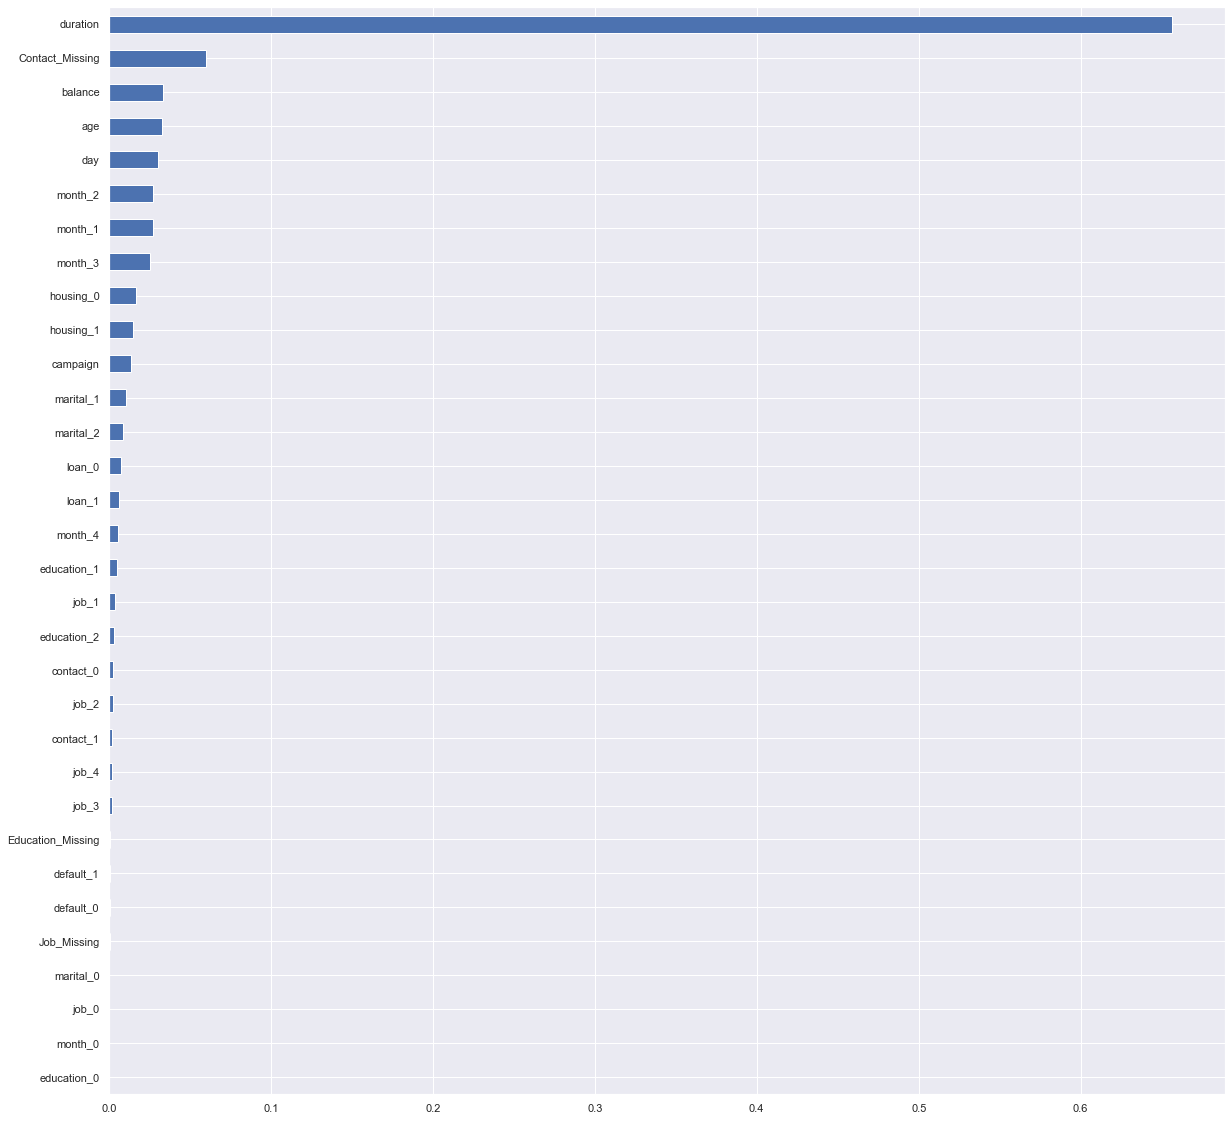

In [112]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model_rf= RandomForestClassifier(max_depth=5, random_state=42,class_weight="balanced_subsample")
model_rf.fit(X_train, y_train)
print(model_rf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_rf.feature_importances_,index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',figsize=(20,20))

plt.show()


# 4. Model Fitting

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve, plot_precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB

In [114]:
# to get balanced value
#len(y_train)/(np.bincount(y_train)*2)

In [115]:
# to get balanced value -2
# out_dict={}
# for classes in unique_classes:
#     out_dict[classes]=data.shape[0]/((data.loc[data["y"]==classes].shape[0])*len(unique_classes))

In [116]:
y_train.value_counts()

0    22261
1     1738
Name: y, dtype: int64

In [117]:
dt = DecisionTreeClassifier(min_samples_leaf=2, criterion="gini", max_depth=7, random_state=42,class_weight="balanced")
gnb = GaussianNB()
rf = RandomForestClassifier(n_estimators=300, max_depth=10, class_weight="balanced_subsample",random_state=42)
brf = BalancedRandomForestClassifier(n_estimators=300,random_state=42,class_weight={0:0.53903688,1:6.90420023})
rbc = RUSBoostClassifier(random_state=42,base_estimator = "RandomForestClassifier",n_estimators = 300, sampling_strategy =float(y_train.value_counts()[1]/y_train.value_counts()[0]),algorithm="SAMME")
knn= KNeighborsClassifier(n_neighbors=5,weights='distance')
svm= SVC(C=1.0, class_weight="balanced", probability=True,random_state=42)
log_reg = LogisticRegression(class_weight="balanced",max_iter=5000)
xgb = XGBClassifier(n_estimators=300, random_state=24, n_jobs=2, scale_pos_weight=(22261/ 1738))


#balanced : n_samples / (n_classes * np.bincount(y))

--------DecisionTreeClassifier--------
The accuracy of model DecisionTreeClassifier is 0.84
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7422
           1       0.31      0.92      0.46       579

    accuracy                           0.84      8001
   macro avg       0.65      0.88      0.68      8001
weighted avg       0.94      0.84      0.88      8001





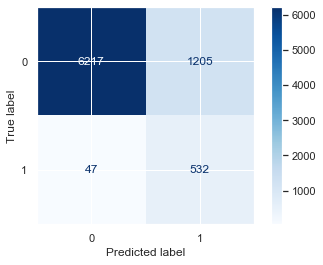

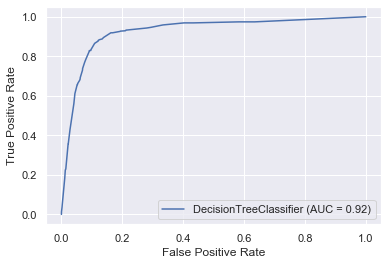

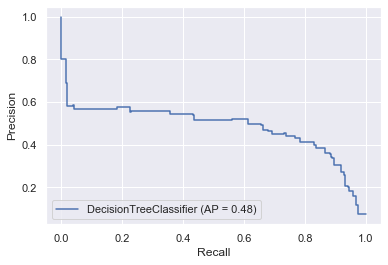

--------GaussianNB--------
The accuracy of model GaussianNB is 0.91
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7422
           1       0.42      0.51      0.46       579

    accuracy                           0.91      8001
   macro avg       0.69      0.73      0.71      8001
weighted avg       0.92      0.91      0.92      8001





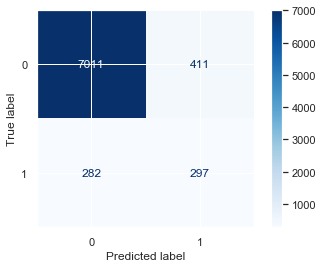

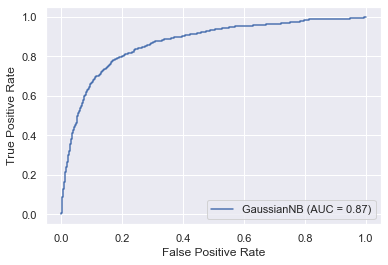

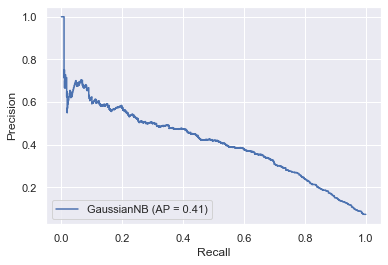

--------RandomForestClassifier--------
The accuracy of model RandomForestClassifier is 0.89
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7422
           1       0.38      0.82      0.52       579

    accuracy                           0.89      8001
   macro avg       0.68      0.86      0.73      8001
weighted avg       0.94      0.89      0.91      8001





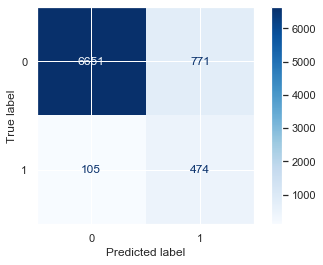

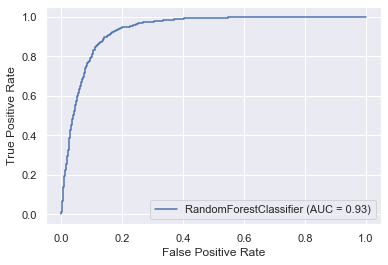

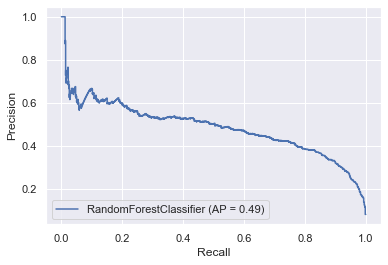

--------BalancedRandomForestClassifier--------
The accuracy of model BalancedRandomForestClassifier is 0.85
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7422
           1       0.31      0.91      0.47       579

    accuracy                           0.85      8001
   macro avg       0.65      0.88      0.69      8001
weighted avg       0.94      0.85      0.88      8001





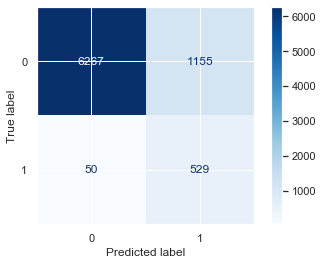

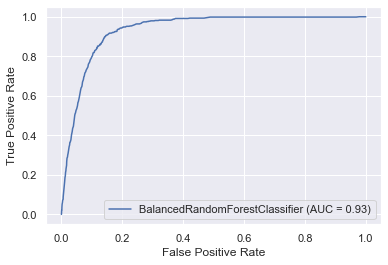

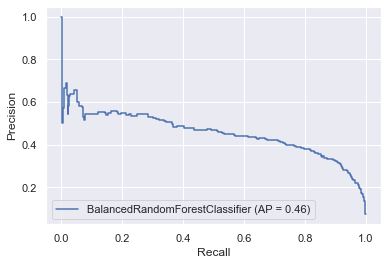

--------KNeighborsClassifier--------
The accuracy of model KNeighborsClassifier is 0.93
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7422
           1       0.51      0.21      0.30       579

    accuracy                           0.93      8001
   macro avg       0.73      0.60      0.63      8001
weighted avg       0.91      0.93      0.91      8001





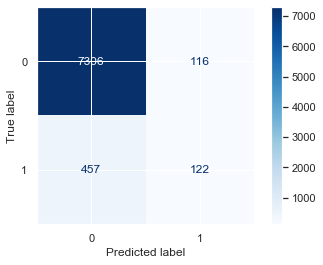

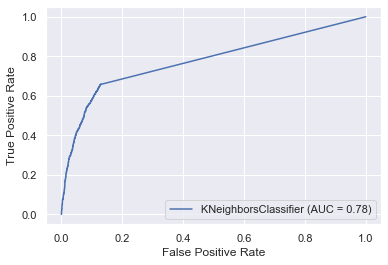

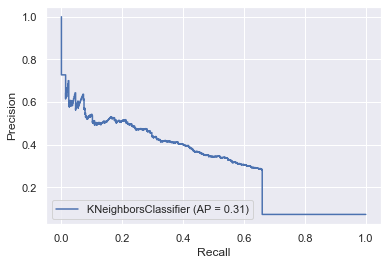

--------SVC--------
The accuracy of model SVC is 0.88
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7422
           1       0.36      0.88      0.51       579

    accuracy                           0.88      8001
   macro avg       0.67      0.88      0.72      8001
weighted avg       0.94      0.88      0.90      8001





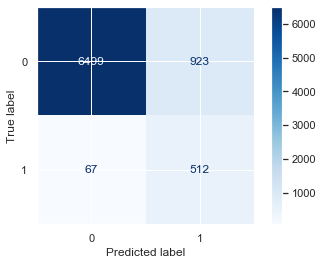

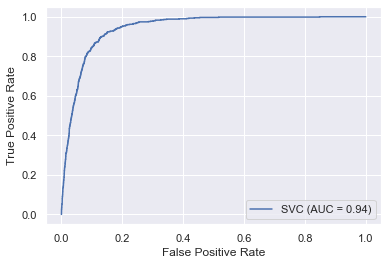

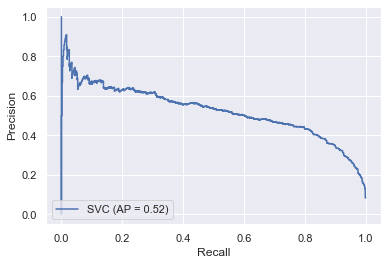

--------LogisticRegression--------
The accuracy of model LogisticRegression is 0.85
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      7422
           1       0.31      0.84      0.45       579

    accuracy                           0.85      8001
   macro avg       0.65      0.85      0.68      8001
weighted avg       0.94      0.85      0.88      8001





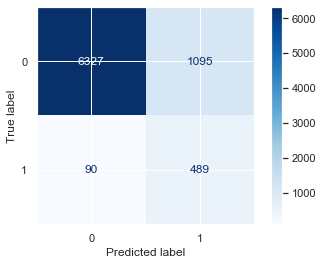

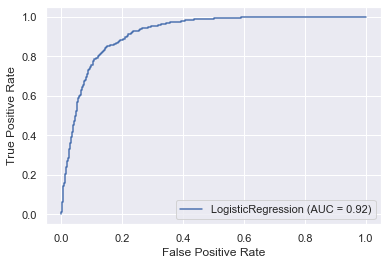

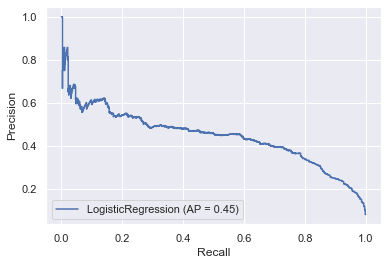

--------XGBClassifier--------
The accuracy of model XGBClassifier is 0.92
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7422
           1       0.46      0.59      0.52       579

    accuracy                           0.92      8001
   macro avg       0.72      0.77      0.74      8001
weighted avg       0.93      0.92      0.93      8001





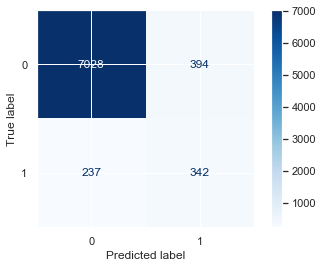

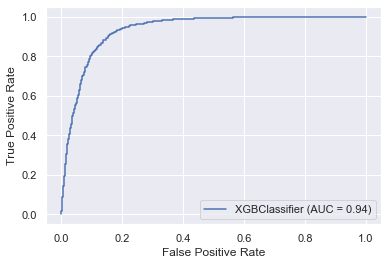

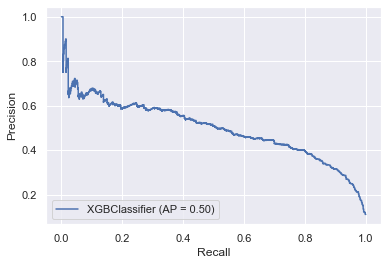

In [118]:
models= [dt, gnb, rf,brf, knn, svm, log_reg,xgb,rbc]
performance_results = pd.DataFrame(columns=["Model_name","Accuracy","Precision","Recall", "Fscore","ROC_AUC"])
performance_results_test = pd.DataFrame(columns=["Model_name","Accuracy","Precision","Recall", "Fscore","ROC_AUC"])

for model in models:
    model_name = type(model).__name__
    print(f"--------{model_name}--------")
    model.fit(X_train, y_train) 
    
    y_pred = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    y_pred_proba = model.predict_proba(X_val)
    y_pred_proba_test = model.predict_proba(X_test)
    
    accuracy= accuracy_score(y_val, y_pred)
    accuracy_test= accuracy_score(y_test, y_pred_test) 
    
    clf_report = classification_report(y_val, y_pred)
    clf_report_test = classification_report(y_test, y_pred_test)
    
    precision, recall, fscore,_ = precision_recall_fscore_support(y_val, y_pred, average='binary',beta= 0.2)
    precision_test, recall_test, fscore_test,_ = precision_recall_fscore_support(y_test, y_pred_test, average='binary',beta= 0.2)
    
    roc_auc = roc_auc_score(y_val, y_pred_proba[:,1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test[:,1])
    
    performance_results = performance_results.append({"Model_name":model_name,"Accuracy":accuracy,"Precision":precision,"Recall":recall,"Fscore":fscore,"ROC_AUC":roc_auc},ignore_index=True)
    performance_results_test = performance_results_test.append({"Model_name":model_name,"Accuracy":accuracy_test,"Precision":precision_test,"Recall":recall_test,"Fscore":fscore_test,"ROC_AUC":roc_auc_test},ignore_index=True)
    
    
    
    print(f"The accuracy of model {model_name} is {accuracy:.2f}")
    print(clf_report)
    print("\n")
    
    plot_confusion_matrix(model, X_val, y_val,
                                 display_labels=["0","1"],
                                 cmap=plt.cm.Blues,
                                 )
    
    plot_roc_curve(model, X_val, y_val)
    plot_precision_recall_curve(model, X_val,y_val)
    plt.show()


In [119]:
performance_results.sort_values(by=["ROC_AUC"], ascending=False)

Model_name  Accuracy  Precision    Recall    Fscore  \
5                             SVC  0.876265   0.356794  0.884283  0.365173   
7                   XGBClassifier  0.921135   0.464674  0.590674  0.468518   
2          RandomForestClassifier  0.890514   0.380723  0.818653  0.388721   
3  BalancedRandomForestClassifier  0.849394   0.314133  0.913644  0.322266   
0          DecisionTreeClassifier  0.843520   0.306275  0.918826  0.314335   
6              LogisticRegression  0.851894   0.308712  0.844560  0.316434   
1                      GaussianNB  0.913386   0.419492  0.512953  0.422452   
4            KNeighborsClassifier  0.928384   0.512605  0.210708  0.485832   

    ROC_AUC  
5  0.942252  
7  0.935193  
2  0.934818  
3  0.932516  
0  0.924419  
6  0.918371  
1  0.867511  
4  0.777551

In [120]:
performance_results_test.sort_values(by=["ROC_AUC"], ascending=False)

Model_name  Accuracy  Precision    Recall    Fscore  \
5                             SVC  0.868875   0.339481  0.858377  0.347562   
3  BalancedRandomForestClassifier  0.842125   0.302312  0.903282  0.310251   
2          RandomForestClassifier  0.887750   0.373111  0.810017  0.381015   
7                   XGBClassifier  0.921375   0.465940  0.590674  0.469755   
6              LogisticRegression  0.846000   0.299324  0.841105  0.306928   
0          DecisionTreeClassifier  0.840250   0.298791  0.896373  0.306654   
1                      GaussianNB  0.914625   0.430667  0.557858  0.434477   
4            KNeighborsClassifier  0.928750   0.520930  0.193437  0.489083   

    ROC_AUC  
5  0.935719  
3  0.933014  
2  0.932931  
7  0.932103  
6  0.917178  
0  0.916308  
1  0.869981  
4  0.792073

We want to show how consistent our models are : 

In [124]:
scores_df= pd.merge(performance_results,performance_results_test,on ="Model_name")
scores_df.drop(["Accuracy_x","Precision_x","Recall_x","Fscore_x","Accuracy_y","Precision_y","Recall_y","Fscore_y"],axis = 1,inplace=True)
scores_df=scores_df.rename(columns = {'ROC_AUC_x':'Validation',"ROC_AUC_y":"Test"})
scores_df["Difference"]=(scores_df["Validation"]-scores_df["Test"])
scores_df.sort_values(by=['Test'], ascending=False,inplace=True)
scores_df.set_index("Model_name",inplace=True)
scores_df

Validation      Test  Difference
Model_name                                                      
SVC                               0.942252  0.935719    0.006532
BalancedRandomForestClassifier    0.932516  0.933014   -0.000498
RandomForestClassifier            0.934818  0.932931    0.001887
XGBClassifier                     0.935193  0.932103    0.003090
LogisticRegression                0.918371  0.917178    0.001193
DecisionTreeClassifier            0.924419  0.916308    0.008111
GaussianNB                        0.867511  0.869981   -0.002469
KNeighborsClassifier              0.777551  0.792073   -0.014522

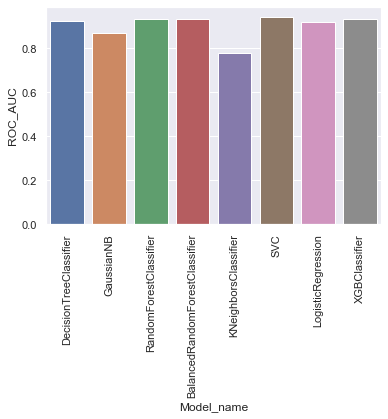

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Model_name",y="ROC_AUC",data=performance_results)
plt.xticks(rotation=90)
plt.show()

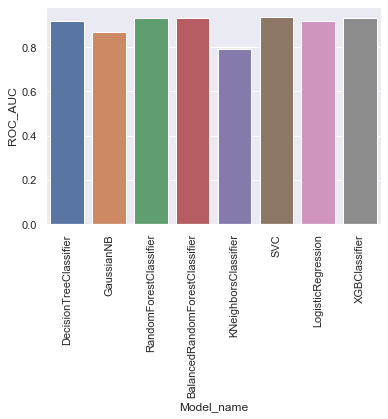

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Model_name",y="ROC_AUC",data=performance_results_test)
plt.xticks(rotation=90)
plt.show()

## 4.1 Cross Validation

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
for model in [brf,rf,svm]:
    print("-------------------")
    print("model : ", model)
    for score in ["recall","roc_auc","balanced_accuracy"]:
        cvs=cross_val_score(model, X_train, y_train,scoring=score, cv=5).mean()
        print(f"{score} : {cvs}")

-------------------
model :  BalancedRandomForestClassifier(class_weight={0: 0.53903688, 1: 6.90420023},
                               n_estimators=300, random_state=42)
recall : 0.895852794064063
roc_auc : 0.9301309551968645
balanced_accuracy : 0.8692237739076913
-------------------
model :  RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=300, random_state=42)
recall : 0.7715823644373778
roc_auc : 0.9310943294795339
balanced_accuracy : 0.8376128187624123
-------------------
model :  SVC(class_weight='balanced', probability=True, random_state=42)
recall : 0.8670873496969096
roc_auc : 0.9374160319144185
balanced_accuracy : 0.8713946123328808


## 4.2 Hyperparameter Tunning

### 4.2.1 Random Forest

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
model_rf = RandomForestClassifier(n_jobs=-1, class_weight={0:0.53903688,1:6.90420023})
params = {
    "n_estimators":[100,300,500],
    "max_depth":[2,10,15,20],
    "min_samples_split":[5,10,15]
}

In [131]:
gcv_rf = GridSearchCV(model_rf, params, verbose=1, cv=5, scoring="roc_auc")

In [132]:
gcv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 16.9min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.53903688,
                                                            1: 6.90420023},
                                              n_jobs=-1),
             param_grid={'max_depth': [2, 10, 15, 20],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc', verbose=1)

In [133]:
gcv_rf.best_params_

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}

In [134]:
gcv_rf.best_estimator_

RandomForestClassifier(class_weight={0: 0.53903688, 1: 6.90420023},
                       max_depth=20, min_samples_split=5, n_estimators=500,
                       n_jobs=-1)

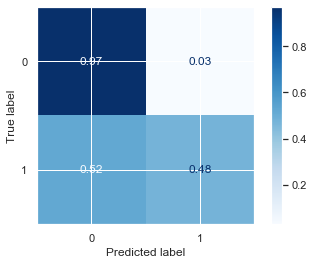

In [135]:
plot_confusion_matrix(gcv_rf, X_test, y_test,normalize="true",cmap=plt.cm.Blues)

### 4.2.2 BalancedRandomForestClassifier

In [136]:
model_brf = BalancedRandomForestClassifier(n_jobs=-1, class_weight={0:0.53903688,1:6.90420023})
params = {
    "n_estimators":[100,300,500],
    "max_depth":[2,10,15,20],
    "min_samples_split":[5,10,15]
}

In [137]:
gcv_brf = GridSearchCV(model_brf, params, verbose=1, cv=5, scoring="roc_auc")

In [138]:
gcv_brf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  7.3min finished


GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(class_weight={0: 0.53903688,
                                                                    1: 6.90420023},
                                                      n_jobs=-1),
             param_grid={'max_depth': [2, 10, 15, 20],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc', verbose=1)

In [139]:
gcv_brf.best_params_

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}

In [140]:
gcv_brf.best_estimator_

BalancedRandomForestClassifier(class_weight={0: 0.53903688, 1: 6.90420023},
                               max_depth=20, min_samples_split=5,
                               n_estimators=500, n_jobs=-1)

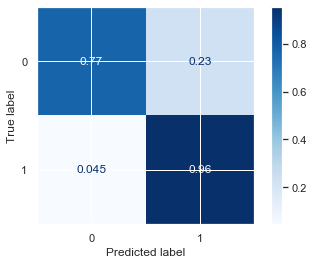

In [141]:
plot_confusion_matrix(gcv_brf, X_test, y_test,normalize="true",cmap=plt.cm.Blues)

# Test Set Performance

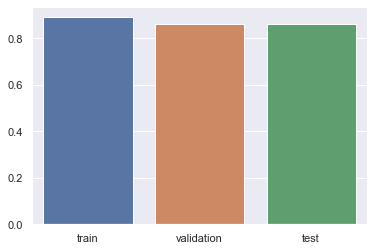

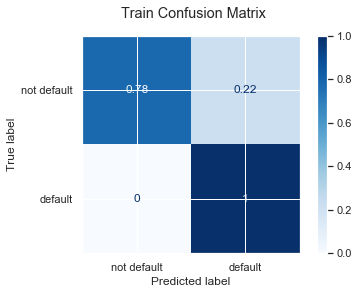

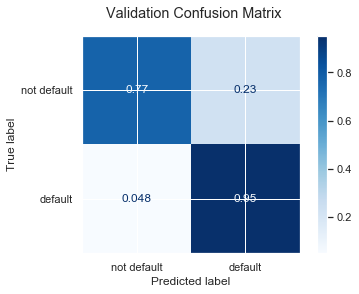

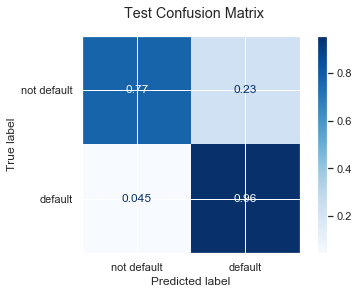

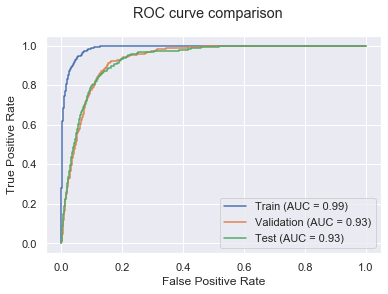

In [143]:
model = BalancedRandomForestClassifier(**gcv_brf.best_params_,n_jobs=-1, class_weight={0:0.53903688,1:6.90420023})
model.fit(X_train, y_train) 

y_pred_tr= model.predict(X_train)
y_pred_proba_tr = model.predict_proba(X_train)

y_pred_val= model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)

y_pred_te= model.predict(X_test)
y_pred_proba_te = model.predict_proba(X_test)

tr_roc_auc= roc_auc_score(y_train, y_pred_tr)
val_roc_auc= roc_auc_score(y_val, y_pred_val)
te_roc_auc= roc_auc_score(y_test, y_pred_te)
ra = {"train":tr_roc_auc,"validation":val_roc_auc,"test":te_roc_auc}
sns.barplot(x=list(ra.keys()),y=list(ra.values()))

tr_conf = plot_confusion_matrix(model, X_train, y_train,
                             display_labels=["not default","default"],
                             cmap=plt.cm.Blues,
                             normalize="true")
tr_conf.figure_.suptitle("Train Confusion Matrix")

val_conf =plot_confusion_matrix(model, X_val, y_val,
                             display_labels=["not default","default"],
                             cmap=plt.cm.Blues,
                             normalize="true")
val_conf.figure_.suptitle("Validation Confusion Matrix")

te_conf = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=["not default","default"],
                             cmap=plt.cm.Blues,
                             normalize="true")
te_conf.figure_.suptitle("Test Confusion Matrix")

tr_roc_disp = plot_roc_curve(model, X_train, y_train,name="Train")
val_roc_disp = plot_roc_curve(model, X_val, y_val, ax=tr_roc_disp.ax_ ,name="Validation")
te_roc_disp = plot_roc_curve(model, X_test, y_test, ax=val_roc_disp.ax_,name="Test")
te_roc_disp.figure_.suptitle("ROC curve comparison")



plt.show()


In [144]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Prepare Data Frame

# Create test bar
validation = go.Bar(
    x= scores_df.index,
    y= scores_df["Validation"],
    name= 'Validation',
    marker= dict(color= 'rgba(255,106,0,0.9)',
                line= dict(color= 'rgb(0,0,0)', width=1)),
    text= scores_df['Difference']
)
# Create train bar
test = go.Bar(
    x= scores_df.index,
    y= scores_df["Test"],
    name= 'Test',
    marker= dict(color= 'rgba(148, 255, 130,0.9)',
                line= dict(color='rgb(0,0,0)', width=1)),
    text= scores_df['Difference']
)
data= [validation, test]
layout= go.Layout(barmode= "group")
fig= go.Figure(data=data, layout=layout)
iplot(fig)